# Cargar todas las librerias que se utilzaran.

In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import pyarrow
import requests
import os
import html
from datetime import datetime
import locale

### Cargar los archivos .CSV que son: homicidios_hechos, homicidios_victimas, lesiones_hechos y lesiones_victimas

In [233]:
# Cargando el archivo CSV para exploración homicidios_hechos
file_path1 = 'data/homicidios_hechos.csv'

datahechos = pd.read_csv(file_path1)

# Mostrar las primeras filas del dataframe y los nombres de las columnas
datahechos.head(), datahechos.columns


(          ID  N_VICTIMAS       FECHA  AAAA  MM  DD      HORA HH  \
 0  2016-0001           1  01/01/2016  2016   1   1  04:00:00  4   
 1  2016-0002           1  01/02/2016  2016   1   2  01:15:00  1   
 2  2016-0003           1  01/03/2016  2016   1   3  07:00:00  7   
 3  2016-0004           1  01/10/2016  2016   1  10  00:00:00  0   
 4  2016-0005           1   1/21/2016  2016   1  21  05:20:00  5   
 
                              LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  Altura  \
 0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  ...     NaN   
 1          AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ  ...     NaN   
 2                         AV ENTRE RIOS 2034       AVENIDA  ...  2034.0   
 3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       AVENIDA  ...     NaN   
 4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        AVENIDA  ...     NaN   
 
                                  Cruce  \
 0  FERNANDEZ DE LA CRUZ, F., GRAL. AV.   
 1                  DE LOS CORRALES AV.   
 2 

In [234]:

# Cargando el archivo CSV para exploración victimas
file_path2 = 'data/homicidios_victimas.csv'

datavictimas = pd.read_csv(file_path2)

# Mostrar las primeras filas del dataframe y los nombres de las columnas
datavictimas.head(), datavictimas.columns


(    ID_hecho       FECHA  AAAA  MM  DD        ROL VICTIMA       SEXO EDAD  \
 0  2016-0001  01/01/2016  2016   1   1  CONDUCTOR    MOTO  MASCULINO   19   
 1  2016-0002  01/02/2016  2016   1   2  CONDUCTOR    AUTO  MASCULINO   70   
 2  2016-0003  01/03/2016  2016   1   3  CONDUCTOR    MOTO  MASCULINO   30   
 3  2016-0004  01/10/2016  2016   1  10  CONDUCTOR    MOTO  MASCULINO   18   
 4  2016-0005   1/21/2016  2016   1  21  CONDUCTOR    MOTO  MASCULINO   29   
 
   FECHA_FALLECIMIENTO  
 0          01/01/2016  
 1          01/02/2016  
 2          01/03/2016  
 3                  SD  
 4          02/01/2016  ,
 Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
        'EDAD', 'FECHA_FALLECIMIENTO'],
       dtype='object'))

In [235]:
# Cargando el archivo CSV para lesiones victimas
file_path3 = 'data/lesiones_victimas.csv'

datavlesionesvictimas = pd.read_csv(file_path3)

# Mostrar las primeras filas del dataframe y los nombres de las columnas
datavlesionesvictimas.head(), datavlesionesvictimas.columns


(          ID hecho   AAA  MM  DD      FECHA  VEHICULO_VICTIMA   SEXO  \
 0  LC-2019-0000053  2019   1   1  01/01/2019               sd  Varon   
 1  LC-2019-0000063  2019   1   1  01/01/2019               sd     SD   
 2  LC-2019-0000079  2019   1   1  01/01/2019               sd  Varon   
 3  LC-2019-0000082  2019   1   1  01/01/2019               sd  Varon   
 4  LC-2019-0000082  2019   1   1  01/01/2019               sd  Mujer   
 
   EDAD_VICTIMA GRAVEDAD  
 0           57       SD  
 1           SD       SD  
 2           SD       SD  
 3           45       SD  
 4           45       SD  ,
 Index(['ID hecho', 'AAA', 'MM', 'DD', 'FECHA ', 'VEHICULO_VICTIMA', 'SEXO',
        'EDAD_VICTIMA', 'GRAVEDAD'],
       dtype='object'))

In [236]:
# Cargando el archivo CSV para lesiones hechos
file_path4 = 'data/lesiones_hechos.csv'

datavlesioneshechos = pd.read_csv(file_path4)

# Mostrar las primeras filas del dataframe y los nombres de las columnas
datavlesioneshechos.head(), datavlesionesvictimas.columns


(                id  n_victimas  aaaa  mm  dd       fecha  hora franja_hora  \
 0  LC-2019-0000179           1  2019   1   1  01/01/2019  9:00           9   
 1  LC-2019-0000053           1  2019   1   1  01/01/2019  1:55           1   
 2  LC-2019-0000063           1  2019   1   1  01/01/2019  2:00           2   
 3  LC-2019-0000079           1  2019   1   1  01/01/2019  2:30           2   
 4  LC-2019-0000082           4  2019   1   1  01/01/2019  4:30           4   
 
   direccion_normalizada comuna  ...     latutid   victima acusado  \
 0                    SD     14  ...  -34.559658  CICLISTA      SD   
 1                    SD      8  ...  -34.669125      AUTO      SD   
 2                    SD      8  ...  -34.677556        SD      SD   
 3                    SD      7  ...  -34.647349    PEATON      SD   
 4                    SD      3  ...  -34.604579      AUTO      SD   
 
    participantes moto auto transporte_publico camion ciclista gravedad  
 0    CICLISTA-SD   SD   SD 

## Hacer la union de los dos exceles de lesiones

In [237]:
# Renombrar columnas para la unión
datavlesionesvictimas.rename(columns={'ID hecho': 'id'}, inplace=True)

# Realizar la unión utilizando la columna 'id'
merged_data = pd.merge(datavlesioneshechos, datavlesionesvictimas, on='id', how='inner')

# Mostrar las primeras filas del DataFrame resultante
merged_head = merged_data.head()

merged_head


,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,ciclista,gravedad,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000179,1,2019,1,1,01/01/2019,9:00,9,SD,14,...,x,SD,2019,1,1,01/01/2019,sd,SD,SD,SD
1,LC-2019-0000053,1,2019,1,1,01/01/2019,1:55,1,SD,8,...,SD,SD,2019,1,1,01/01/2019,sd,Varon,57,SD
2,LC-2019-0000063,1,2019,1,1,01/01/2019,2:00,2,SD,8,...,SD,SD,2019,1,1,01/01/2019,sd,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,01/01/2019,2:30,2,SD,7,...,SD,SD,2019,1,1,01/01/2019,sd,Varon,SD,SD
4,LC-2019-0000082,4,2019,1,1,01/01/2019,4:30,4,SD,3,...,SD,SD,2019,1,1,01/01/2019,sd,Varon,45,SD


In [238]:
# Eliminar las columnas que no se van a usar
columns_to_remove = ['AAA', 'MM', 'DD', 'FECHA ', 'GRAVEDAD','fecha', 
    'franja_hora', 
    'direccion_normalizada', 
    'tipo_calle', 
    'otra_direccion', 
    'calle', 
    'altura', 
    'cruce', 
    'geocodificacion_CABA']
lesiones_combinado = merged_data.drop(columns=columns_to_remove)

# Mostrar las primeras filas del DataFrame resultante para verificar
lesiones_combinado.head()


,id,n_victimas,aaaa,mm,dd,hora,comuna,longitud,latutid,victima,...,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA
0,LC-2019-0000179,1,2019,1,1,9:00,14,-58.408911,-34.559658,CICLISTA,...,CICLISTA-SD,SD,SD,SD,SD,x,SD,sd,SD,SD
1,LC-2019-0000053,1,2019,1,1,1:55,8,-58.44351,-34.669125,AUTO,...,AUTO-SD,SD,x,SD,SD,SD,SD,sd,Varon,57
2,LC-2019-0000063,1,2019,1,1,2:00,8,-58.468335,-34.677556,SD,...,SD-SD,SD,SD,SD,SD,SD,SD,sd,SD,SD
3,LC-2019-0000079,1,2019,1,1,2:30,7,-58.437425,-34.647349,PEATON,...,PEATON-SD,x,SD,SD,SD,SD,SD,sd,Varon,SD
4,LC-2019-0000082,4,2019,1,1,4:30,3,-58.398225,-34.604579,AUTO,...,AUTO-SD,SD,SD,x,SD,SD,SD,sd,Varon,45


In [239]:
# Definir el nuevo path de destino
file_path5 = 'data/lesiones_combinado.csv'

# Guardar el archivo combinado en el nuevo path
lesiones_combinado.to_csv(file_path5, index=False)

In [240]:
# Cargando el archivo CSV para lesiones victimas
file_path5 = 'data/lesiones_combinado.csv'

lesiones_combinado = pd.read_csv(file_path5)

lesiones_combinado

,id,n_victimas,aaaa,mm,dd,hora,comuna,longitud,latutid,victima,...,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA
0,LC-2019-0000179,1,2019,1,1,9:00,14,-58.408911,-34.559658,CICLISTA,...,CICLISTA-SD,SD,SD,SD,SD,x,SD,sd,SD,SD
1,LC-2019-0000053,1,2019,1,1,1:55,8,-58.44351,-34.669125,AUTO,...,AUTO-SD,SD,x,SD,SD,SD,SD,sd,Varon,57
2,LC-2019-0000063,1,2019,1,1,2:00,8,-58.468335,-34.677556,SD,...,SD-SD,SD,SD,SD,SD,SD,SD,sd,SD,SD
3,LC-2019-0000079,1,2019,1,1,2:30,7,-58.437425,-34.647349,PEATON,...,PEATON-SD,x,SD,SD,SD,SD,SD,sd,Varon,SD
4,LC-2019-0000082,4,2019,1,1,4:30,3,-58.398225,-34.604579,AUTO,...,AUTO-SD,SD,SD,x,SD,SD,SD,sd,Varon,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27593,LC-2021-0652865,2,2021,12,31,19:40,9,-58.488326609395,-34.641753304864,SD,...,SD-SD,SD,SD,SD,SD,SD,SD,SD,Varon,28
27594,LC-2021-0652865,2,2021,12,31,19:40,9,-58.488326609395,-34.641753304864,SD,...,SD-SD,SD,SD,SD,SD,SD,SD,SD,Varon,52
27595,LC-2021-0652907,1,2021,12,31,20:00,1,-58.382894,-34.583083,SD,...,SD-SD,SD,SD,SD,SD,SD,SD,SD,Varon,23
27596,LC-2021-0652921,1,2021,12,31,22:00,5,-58.414532050899,-34.614288229345,MOTO,...,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE,MOTO,Varon,31


## ETL para cargar un archivo extra, para ver el flujo vehicular

In [241]:
# URL del archivo CSV Victimas siniestos 2015-2018
url = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/flujo-vehicular-anillo-digital/dataset_flujo_vehicular.csv'

# Ruta para guardar el archivo, cambiarla si es necesitario 
save_path = 'C:/Users/Edgar/OneDrive/Escritorio/PROYECTOS FINALES 1 Y 2 HENRY/ProyectoFinal2PowerBIEdgarArriaga/data'
os.makedirs(save_path, exist_ok=True)  # Crea la ruta si no existe

# Nombre del archivo CSV (puedes extraer esto de la URL o nombrarlo como desees)
filename = 'Flujo_vehicular.csv'
complete_name = os.path.join(save_path, filename)

# Realiza la petición GET para descargar el archivo
response = requests.get(url)

# Verifica que la petición fue exitosa
if response.status_code == 200:
    # Escribe el contenido del archivo en la ruta especificada
    with open(complete_name, 'wb') as file:
        file.write(response.content)
    print(f'Archivo descargado y guardado en: {complete_name}')
else:
    print(f'Error al descargar el archivo: {response.status_code}')


Archivo descargado y guardado en: C:/Users/Edgar/OneDrive/Escritorio/PROYECTOS FINALES 1 Y 2 HENRY/ProyectoFinal2PowerBIEdgarArriaga/data\Flujo_vehicular.csv


In [242]:
# Cargando el archivo CSV para exploración
file_path3 = 'data/Flujo_vehicular.csv'

dataflujo = pd.read_csv(file_path3)

# Mostrar las primeras filas del dataframe y los nombres de las columnas
dataflujo.head(), dataflujo.columns


(  CODIGO_LOCACION                HORA  CANTIDAD  SENTIDO    LATITUD   LONGITUD
 0       48Q3CJ00+  31MAR2020:15:00:00       729  Interna -34.588796 -58.381520
 1       48Q3CJ00+  31MAR2020:15:00:00       447   Egreso -34.588796 -58.381520
 2       48Q39G00+  31MAR2020:15:00:00       175  Interna -34.633299 -58.468594
 3       48Q39G00+  31MAR2020:15:00:00      1186   Egreso -34.633299 -58.468594
 4       48Q3CH00+  31MAR2020:15:00:00        35   Egreso -34.579632 -58.427733,
 Index(['CODIGO_LOCACION', 'HORA', 'CANTIDAD', 'SENTIDO', 'LATITUD',
        'LONGITUD'],
       dtype='object'))

In [243]:
# Realizar un análisis de las columnas
column_analysis = {
    'Column Name': dataflujo.columns,
    'Data Type': dataflujo.dtypes,
    'Missing Values': dataflujo.isnull().sum(),
    'Unique Values': dataflujo.nunique()
}

column_analysis_df = pd.DataFrame(column_analysis)

# Mostrar el DataFrame con el análisis de las columnas
print(column_analysis_df)

                     Column Name Data Type  Missing Values  Unique Values
CODIGO_LOCACION  CODIGO_LOCACION    object               0              9
HORA                        HORA    object               0          17694
CANTIDAD                CANTIDAD     int64               0          10882
SENTIDO                  SENTIDO    object               0              3
LATITUD                  LATITUD   float64            3402              7
LONGITUD                LONGITUD   float64            3402              7


In [244]:
dataflujo['AÑO'] = dataflujo['HORA'].apply(lambda x: x[5:9])
dataflujo['HORA_EXTRACTED'] = dataflujo['HORA'].apply(lambda x: x[10:15])
dataflujo = dataflujo.drop(columns=['CODIGO_LOCACION'])

In [245]:
dataflujo

,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD,AÑO,HORA_EXTRACTED
0,31MAR2020:15:00:00,729,Interna,-34.588796,-58.381520,2020,15:00
1,31MAR2020:15:00:00,447,Egreso,-34.588796,-58.381520,2020,15:00
2,31MAR2020:15:00:00,175,Interna,-34.633299,-58.468594,2020,15:00
3,31MAR2020:15:00:00,1186,Egreso,-34.633299,-58.468594,2020,15:00
4,31MAR2020:15:00:00,35,Egreso,-34.579632,-58.427733,2020,15:00
...,...,...,...,...,...,...,...
189809,26JAN2022:15:00:00,6542,Ingreso,-34.633299,-58.468594,2022,15:00
189810,26JAN2022:15:00:00,1168,Interna,-34.633299,-58.468594,2022,15:00
189811,26JAN2022:16:00:00,7870,Egreso,-34.633299,-58.468594,2022,16:00
189812,26JAN2022:16:00:00,5991,Ingreso,-34.633299,-58.468594,2022,16:00


In [246]:
# Convertir la columna AÑO a entero
dataflujo['AÑO'] = dataflujo['AÑO'].astype(int)

# Convertir la columna HORA_EXTRACTED a tipo hora
dataflujo['HORA_EXTRACTED'] = pd.to_datetime(dataflujo['HORA_EXTRACTED'], format='%H:%M').dt.time

print(dataflujo.dtypes)  # Verificar los tipos de datos
print(dataflujo)  # Mostrar el DataFrame actualizado


HORA               object
CANTIDAD            int64
SENTIDO            object
LATITUD           float64
LONGITUD          float64
AÑO                 int32
HORA_EXTRACTED     object
dtype: object
                      HORA  CANTIDAD  SENTIDO    LATITUD   LONGITUD   AÑO  \
0       31MAR2020:15:00:00       729  Interna -34.588796 -58.381520  2020   
1       31MAR2020:15:00:00       447   Egreso -34.588796 -58.381520  2020   
2       31MAR2020:15:00:00       175  Interna -34.633299 -58.468594  2020   
3       31MAR2020:15:00:00      1186   Egreso -34.633299 -58.468594  2020   
4       31MAR2020:15:00:00        35   Egreso -34.579632 -58.427733  2020   
...                    ...       ...      ...        ...        ...   ...   
189809  26JAN2022:15:00:00      6542  Ingreso -34.633299 -58.468594  2022   
189810  26JAN2022:15:00:00      1168  Interna -34.633299 -58.468594  2022   
189811  26JAN2022:16:00:00      7870   Egreso -34.633299 -58.468594  2022   
189812  26JAN2022:16:00:00      59

In [247]:
from datetime import datetime

def asignar_momento_dia(hora):
    if pd.notnull(hora):
        if 6 <= hora.hour < 12:
            return "Mañana"
        elif 12 <= hora.hour < 18:
            return "Tarde"
        elif 18 <= hora.hour < 24:
            return "Noche"
        else:
            return "Madrugada"
    else:
        return "Sin Dato"

# Aplicar la función para crear una nueva columna 'Momento del dia'
dataflujo['Momento del dia'] = dataflujo['HORA_EXTRACTED'].apply(asignar_momento_dia)

# Mostrar las primeras filas para verificar la aplicación correcta de la función
dataflujo.head()


,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD,AÑO,HORA_EXTRACTED,Momento del dia
0,31MAR2020:15:00:00,729,Interna,-34.588796,-58.381520,2020,15:00:00,Tarde
1,31MAR2020:15:00:00,447,Egreso,-34.588796,-58.381520,2020,15:00:00,Tarde
2,31MAR2020:15:00:00,175,Interna,-34.633299,-58.468594,2020,15:00:00,Tarde
3,31MAR2020:15:00:00,1186,Egreso,-34.633299,-58.468594,2020,15:00:00,Tarde
4,31MAR2020:15:00:00,35,Egreso,-34.579632,-58.427733,2020,15:00:00,Tarde


In [248]:
# Guardar el DataFrame modificado en un nuevo archivo CSV
output_file_path4 = 'data/Flujo_vehicular_modificado.csv'
dataflujo.to_csv(output_file_path4, index=False)

output_file_path4


'data/Flujo_vehicular_modificado.csv'

In [249]:
dataflujo

,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD,AÑO,HORA_EXTRACTED,Momento del dia
0,31MAR2020:15:00:00,729,Interna,-34.588796,-58.381520,2020,15:00:00,Tarde
1,31MAR2020:15:00:00,447,Egreso,-34.588796,-58.381520,2020,15:00:00,Tarde
2,31MAR2020:15:00:00,175,Interna,-34.633299,-58.468594,2020,15:00:00,Tarde
3,31MAR2020:15:00:00,1186,Egreso,-34.633299,-58.468594,2020,15:00:00,Tarde
4,31MAR2020:15:00:00,35,Egreso,-34.579632,-58.427733,2020,15:00:00,Tarde
...,...,...,...,...,...,...,...,...
189809,26JAN2022:15:00:00,6542,Ingreso,-34.633299,-58.468594,2022,15:00:00,Tarde
189810,26JAN2022:15:00:00,1168,Interna,-34.633299,-58.468594,2022,15:00:00,Tarde
189811,26JAN2022:16:00:00,7870,Egreso,-34.633299,-58.468594,2022,16:00:00,Tarde
189812,26JAN2022:16:00:00,5991,Ingreso,-34.633299,-58.468594,2022,16:00:00,Tarde


# **<center>ANALISIS EDA CSV HOMICIDIOS_VICTIMAS</center>**

In [250]:
# Contar cuántos 'SD' hay en cada una de las columnas específicas antes de reemplazarlos
columns_to_replace = ['ROL', 'VICTIMA', 'SEXO', 'FECHA_FALLECIMIENTO']
sd_count = {col: (datavictimas[col] == 'SD').sum() for col in columns_to_replace}
sd_count


{'ROL': 11, 'VICTIMA': 9, 'SEXO': 6, 'FECHA_FALLECIMIENTO': 68}

In [251]:
# Reemplazar 'SD' por NaN en las columnas especificadas
datavictimas[columns_to_replace] = datavictimas[columns_to_replace].replace('SD', np.nan)

# Mostrar las primeras filas después de la modificación para verificar los cambios
datavictimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,01/01/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,01/01/2016
1,2016-0002,01/02/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,01/02/2016
2,2016-0003,01/03/2016,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,01/03/2016
3,2016-0004,01/10/2016,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,NaN
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,02/01/2016


In [252]:
# Contar cuántos 'SD' originalmente había en la columna 'EDAD' antes de cualquier cambio
sd_count_edad = (datavictimas['EDAD'] == 'SD').sum()
sd_count_edad

53

In [253]:
#Convetir los SD de la columna edad por el promedio de edad
# Convertir 'EDAD' a numérico, forzando errores a NaN
datavictimas['EDAD'] = pd.to_numeric(datavictimas['EDAD'], errors='coerce')

# Calcular el promedio de la columna 'EDAD' excluyendo NaN
average_age = datavictimas['EDAD'].mean()
average_age

42.16716867469879

In [254]:
# Reemplazar valores NaN en 'EDAD' con 42 (redondeado)
datavictimas['EDAD'].fillna(42, inplace=True)

# Convertir todos los valores de 'EDAD' a enteros
datavictimas['EDAD'] = datavictimas['EDAD'].astype(int)

datavictimas.head()


C:\Users\Edgar\AppData\Local\Temp\ipykernel_23244\2189837703.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datavictimas['EDAD'].fillna(42, inplace=True)


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,01/01/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,01/01/2016
1,2016-0002,01/02/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,01/02/2016
2,2016-0003,01/03/2016,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,01/03/2016
3,2016-0004,01/10/2016,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,NaN
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,02/01/2016


In [255]:
# Convertir la columna 'EDAD' a numérico y fecha a date
datavictimas['EDAD'] = pd.to_numeric(datavictimas['EDAD'], errors='coerce')

datavictimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(datavictimas['FECHA_FALLECIMIENTO'], errors='coerce').dt.date

# Resumen estadístico por año para 'ROL', 'VICTIMA', 'SEXO' y 'EDAD'
summary_by_year = datavictimas.groupby('AAAA').agg(
    Total_Casos=pd.NamedAgg(column='ID_hecho', aggfunc='count'),
    Media_Edad=pd.NamedAgg(column='EDAD', aggfunc='mean'),
    Cantidad_Sexos=pd.NamedAgg(column='SEXO', aggfunc=lambda x: x.value_counts().to_dict()),
    Cantidad_Roles=pd.NamedAgg(column='ROL', aggfunc=lambda x: x.value_counts().to_dict()),
    Cantidad_Victimas=pd.NamedAgg(column='VICTIMA', aggfunc=lambda x: x.value_counts().to_dict())
)

summary_by_year


,Total_Casos,Media_Edad,Cantidad_Sexos,Cantidad_Roles,Cantidad_Victimas
AAAA,,,,,
2016,146,40.006849,"{'MASCULINO': 113, 'FEMENINO': 27}","{'CONDUCTOR': 71, 'PEATON': 49, 'PASAJERO_ACOM...","{'MOTO': 65, 'PEATON': 49, 'AUTO': 18, 'BICICL..."
2017,140,39.835714,"{'MASCULINO': 104, 'FEMENINO': 36}","{'CONDUCTOR': 58, 'PEATON': 49, 'PASAJERO_ACOM...","{'MOTO': 56, 'PEATON': 49, 'AUTO': 25, 'BICICL..."
2018,149,43.167785,"{'MASCULINO': 111, 'FEMENINO': 38}","{'PEATON': 66, 'CONDUCTOR': 65, 'PASAJERO_ACOM...","{'PEATON': 66, 'MOTO': 57, 'AUTO': 17, 'BICICL..."
2019,104,42.019231,"{'MASCULINO': 77, 'FEMENINO': 27}","{'CONDUCTOR': 53, 'PEATON': 35, 'PASAJERO_ACOM...","{'MOTO': 50, 'PEATON': 35, 'AUTO': 11, 'BICICL..."
2020,81,47.061728,"{'MASCULINO': 65, 'FEMENINO': 16}","{'CONDUCTOR': 36, 'PEATON': 35, 'PASAJERO_ACOM...","{'PEATON': 35, 'MOTO': 29, 'AUTO': 12, 'BICICL..."
2021,97,43.226804,"{'MASCULINO': 75, 'FEMENINO': 22}","{'CONDUCTOR': 47, 'PEATON': 33, 'PASAJERO_ACOM...","{'MOTO': 46, 'PEATON': 33, 'AUTO': 11, 'BICICL..."


In [256]:
# Resumen estadístico por año y mes para 'ROL', 'VICTIMA', 'SEXO' y 'EDAD'
summary_by_year_month = datavictimas.groupby(['AAAA', 'MM']).agg(
    Total_Casos=pd.NamedAgg(column='ID_hecho', aggfunc='count'),
    Media_Edad=pd.NamedAgg(column='EDAD', aggfunc='mean'),
    Cantidad_Sexos=pd.NamedAgg(column='SEXO', aggfunc=lambda x: x.value_counts().to_dict()),
    Cantidad_Roles=pd.NamedAgg(column='ROL', aggfunc=lambda x: x.value_counts().to_dict()),
    Cantidad_Victimas=pd.NamedAgg(column='VICTIMA', aggfunc=lambda x: x.value_counts().to_dict())
).reset_index()

summary_by_year_month


,AAAA,MM,Total_Casos,Media_Edad,Cantidad_Sexos,Cantidad_Roles,Cantidad_Victimas
0,2016,1,8,30.375000,{'MASCULINO': 8},"{'CONDUCTOR': 7, 'PASAJERO_ACOMPAÑANTE': 1}","{'MOTO': 7, 'AUTO': 1}"
1,2016,2,12,35.750000,"{'MASCULINO': 9, 'FEMENINO': 3}","{'PEATON': 5, 'PASAJERO_ACOMPAÑANTE': 4, 'COND...","{'PEATON': 5, 'AUTO': 4, 'MOTO': 3}"
2,2016,3,13,36.615385,"{'MASCULINO': 12, 'FEMENINO': 1}","{'CONDUCTOR': 6, 'PEATON': 5, 'PASAJERO_ACOMPA...","{'MOTO': 8, 'PEATON': 5}"
3,2016,4,11,45.090909,"{'MASCULINO': 8, 'FEMENINO': 1}","{'PEATON': 5, 'CONDUCTOR': 4}","{'MOTO': 5, 'PEATON': 5}"
4,2016,5,7,36.000000,"{'MASCULINO': 5, 'FEMENINO': 2}","{'PEATON': 4, 'CONDUCTOR': 2, 'PASAJERO_ACOMPA...","{'PEATON': 4, 'MOTO': 2, 'AUTO': 1}"
...,...,...,...,...,...,...,...
67,2021,8,9,43.555556,"{'MASCULINO': 7, 'FEMENINO': 2}","{'PEATON': 5, 'CONDUCTOR': 3, 'PASAJERO_ACOMPA...","{'PEATON': 5, 'MOTO': 3, 'AUTO': 1}"
68,2021,9,4,63.250000,"{'FEMENINO': 2, 'MASCULINO': 2}","{'PEATON': 2, 'CICLISTA': 1, 'CONDUCTOR': 1}","{'PEATON': 2, 'BICICLETA': 1, 'MOTO': 1}"
69,2021,10,5,31.600000,"{'MASCULINO': 4, 'FEMENINO': 1}","{'CONDUCTOR': 4, 'PEATON': 1}","{'MOTO': 4, 'PEATON': 1}"
70,2021,11,8,47.000000,"{'MASCULINO': 7, 'FEMENINO': 1}","{'CONDUCTOR': 5, 'PEATON': 2, 'CICLISTA': 1}","{'MOTO': 4, 'PEATON': 2, 'AUTO': 1, 'BICICLETA..."


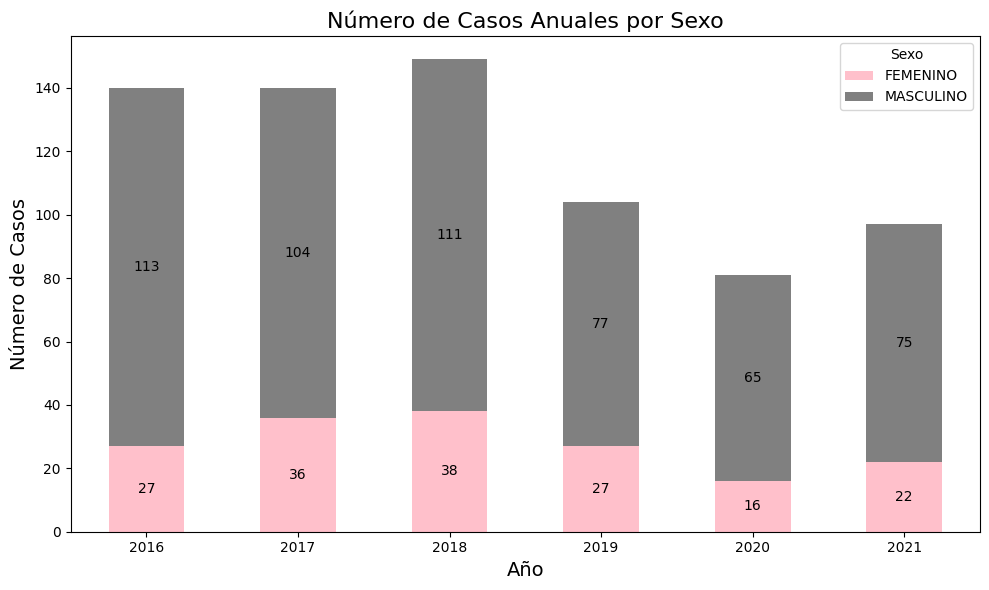

In [257]:
# Crear un dataframe para la visualización anual y por sexo
annual_sex_distribution = datavictimas.groupby(['AAAA', 'SEXO']).size().unstack(fill_value=0)

# Graficar
fig, ax = plt.subplots(figsize=(10, 6))
# Guarda las barras para poder acceder a sus valores
bars = annual_sex_distribution.plot(kind='bar', stacked=True, ax=ax, color=['pink', 'gray', 'gray'])

ax.set_title('Número de Casos Anuales por Sexo', fontsize=16)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Número de Casos', fontsize=14)
ax.legend(title='Sexo')
plt.xticks(rotation=0)

# Añadir etiquetas de datos en cada barra
for p in bars.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Solo poner etiquetas en barras con altura mayor a 0 para evitar desorden
        ax.text(x + width/2, 
                y + height/2, 
                f'{int(height)}', 
                ha='center', 
                va='center')

plt.tight_layout()
plt.show()

#### Con el grafico de arriba se puede ver que en el 2020 bajaron los numeros de accidentes por el COVID, ya que las personas no podian salir de sus casas, ademas de que hay un numero mucho mayor de casos de hombres en todos los años. 

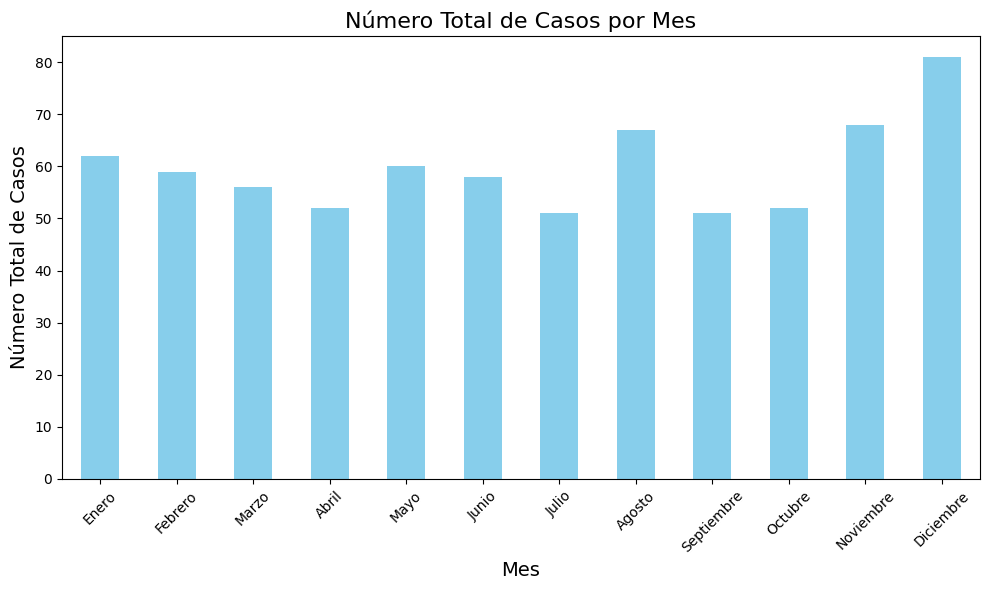

In [258]:
# Crear un dataframe para la visualización mensual (ignorando el año)
monthly_distribution = datavictimas.groupby('MM').size()

# Graficar
fig, ax = plt.subplots(figsize=(10, 6))
monthly_distribution.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Número Total de Casos por Mes', fontsize=16)
ax.set_xlabel('Mes', fontsize=14)
ax.set_ylabel('Número Total de Casos', fontsize=14)
ax.set_xticklabels([
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
], rotation=45)
plt.tight_layout()
plt.show()


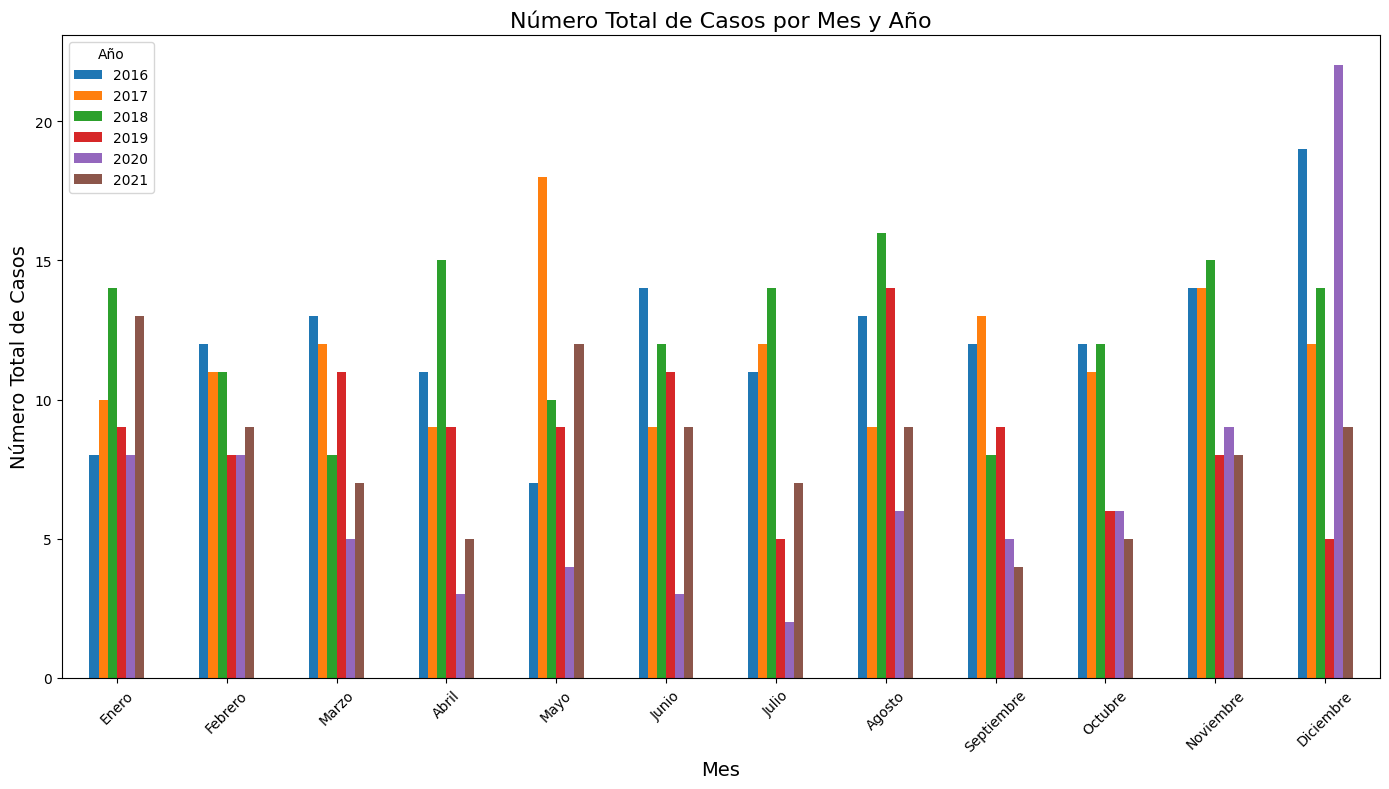

In [259]:
# Crear un dataframe para la visualización mensual desglosado por año
monthly_yearly_distribution = datavictimas.groupby(['AAAA', 'MM']).size().unstack(fill_value=0)

# Graficar
fig, ax = plt.subplots(figsize=(14, 8))
monthly_yearly_distribution.T.plot(kind='bar', ax=ax)
ax.set_title('Número Total de Casos por Mes y Año', fontsize=16)
ax.set_xlabel('Mes', fontsize=14)
ax.set_ylabel('Número Total de Casos', fontsize=14)
ax.legend(title='Año')
ax.set_xticklabels([
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
], rotation=45)
plt.tight_layout()
plt.show()
# UN AUMENTO MUY GRANDE EN DICEIEMBRE DEL 2020, AÑO DEL COVID

#### Con los graficos de arriba se puede ver que hay una estacionalidad con los numeros de casos de fallecimientos en el mes de Diciembre. Entonces se podria proponer mas precauciones en este mes, ya que es el mes con mayor numero de casos en casi todos los años.

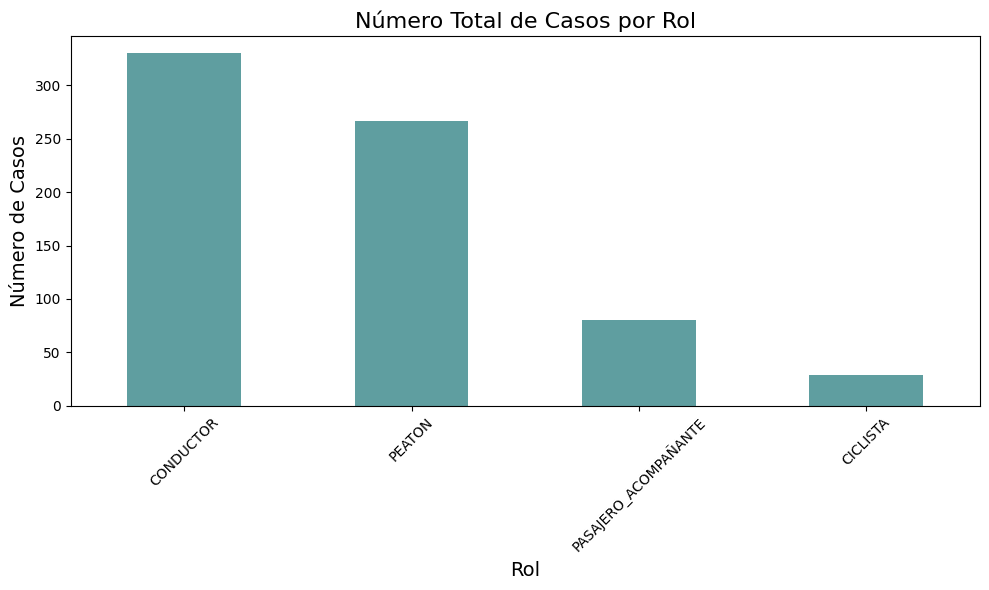

In [260]:
# Crear un dataframe para la visualización general por rol
total_role_distribution = datavictimas['ROL'].value_counts()

# Graficar
fig, ax = plt.subplots(figsize=(10, 6))
total_role_distribution.plot(kind='bar', ax=ax, color='cadetblue')
ax.set_title('Número Total de Casos por Rol', fontsize=16)
ax.set_xlabel('Rol', fontsize=14)
ax.set_ylabel('Número de Casos', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Con la grafica de arriba se ve que el rol con mayor numero de casos de fallecimiento es el de conductor, seguido de peaton

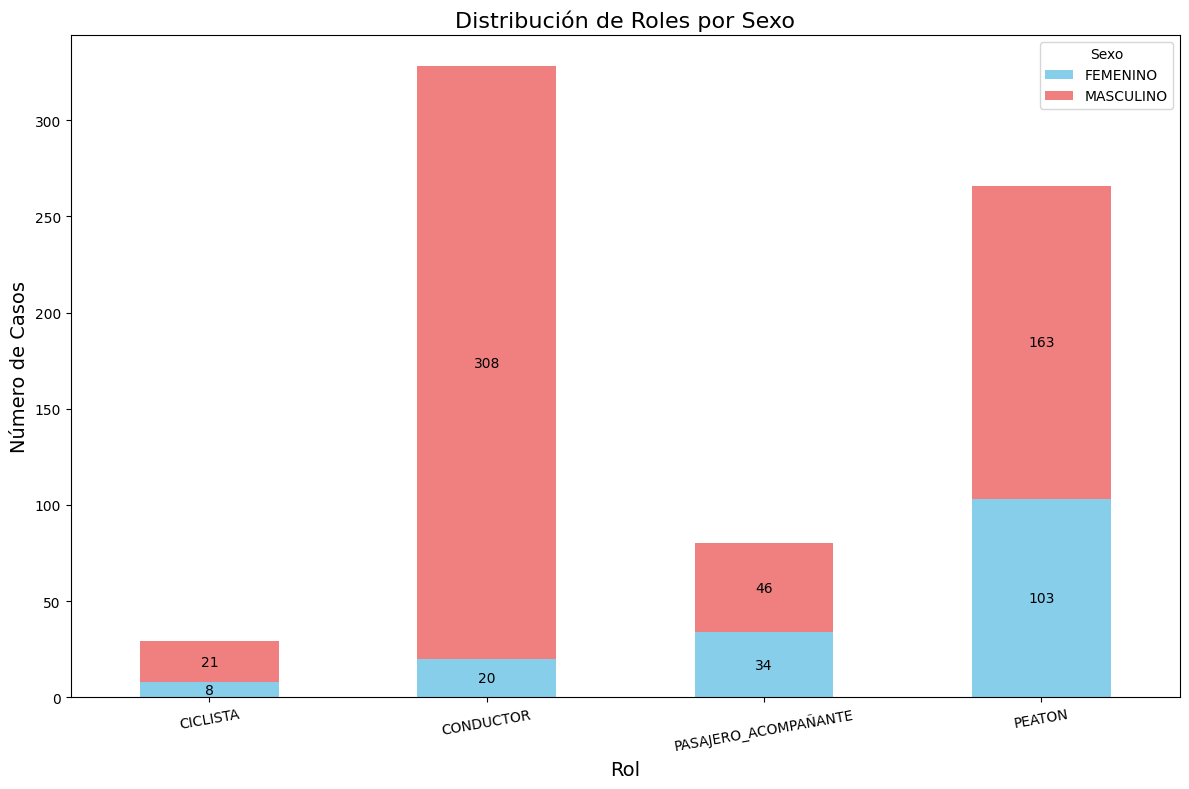

In [261]:
# Crear un dataframe para la visualización por rol y sexo
role_sex_distribution = datavictimas.groupby(['ROL', 'SEXO']).size().unstack(fill_value=0)

# Graficar
fig, ax = plt.subplots(figsize=(12, 8))
bars = role_sex_distribution.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'lightcoral', 'grey'])

ax.set_title('Distribución de Roles por Sexo', fontsize=16)
ax.set_xlabel('Rol', fontsize=14)
ax.set_ylabel('Número de Casos', fontsize=14)
ax.legend(title='Sexo')
plt.xticks(rotation=10)

# Añadir etiquetas de datos en cada barra
for p in bars.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Solo colocar etiquetas en barras con altura mayor a 0
        ax.text(x + width/2, 
                y + height/2, 
                f'{int(height)}', 
                ha='center', 
                va='center')

plt.tight_layout()
plt.show()


#### Con la grafica de arriba podemos ver que el numero de casos es en la mayoria hombres, excepto para peaton y pasajero acompañanete, que es mas o menos parecido el de hombres y mujeres. Ademas podemos observar que los roles más frecuentes son los conductores y los peatones.

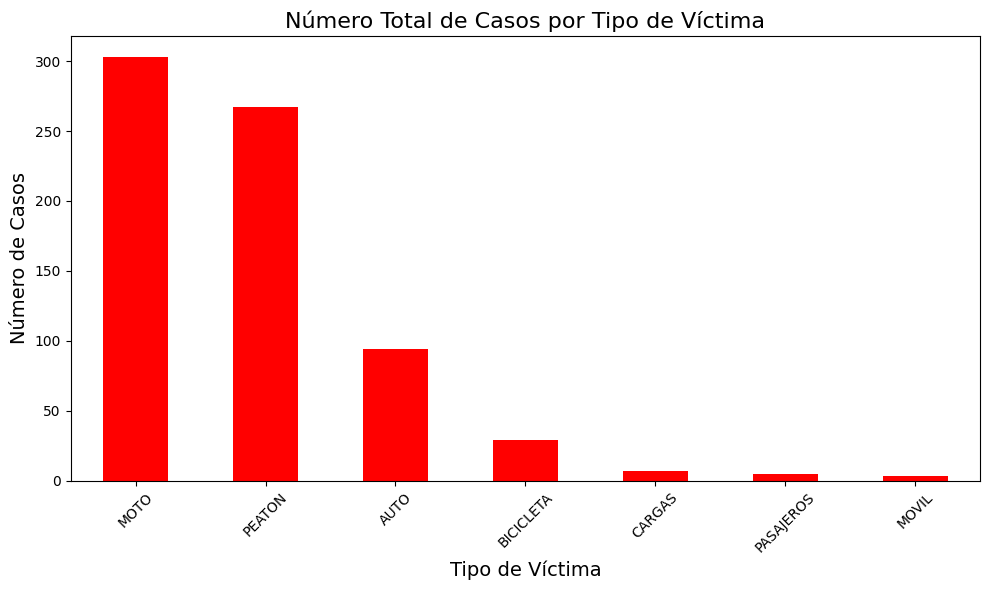

In [262]:
# Crear un dataframe para la visualización general por tipo de víctima
total_victim_type_distribution = datavictimas['VICTIMA'].value_counts()

# Graficar
fig, ax = plt.subplots(figsize=(10, 6))
total_victim_type_distribution.plot(kind='bar', ax=ax, color='red')
ax.set_title('Número Total de Casos por Tipo de Víctima', fontsize=16)
ax.set_xlabel('Tipo de Víctima', fontsize=14)
ax.set_ylabel('Número de Casos', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Se puede visualizar que el mayor numero casos de fallecimiento son las victimas que van en moto, seguido de los peatones

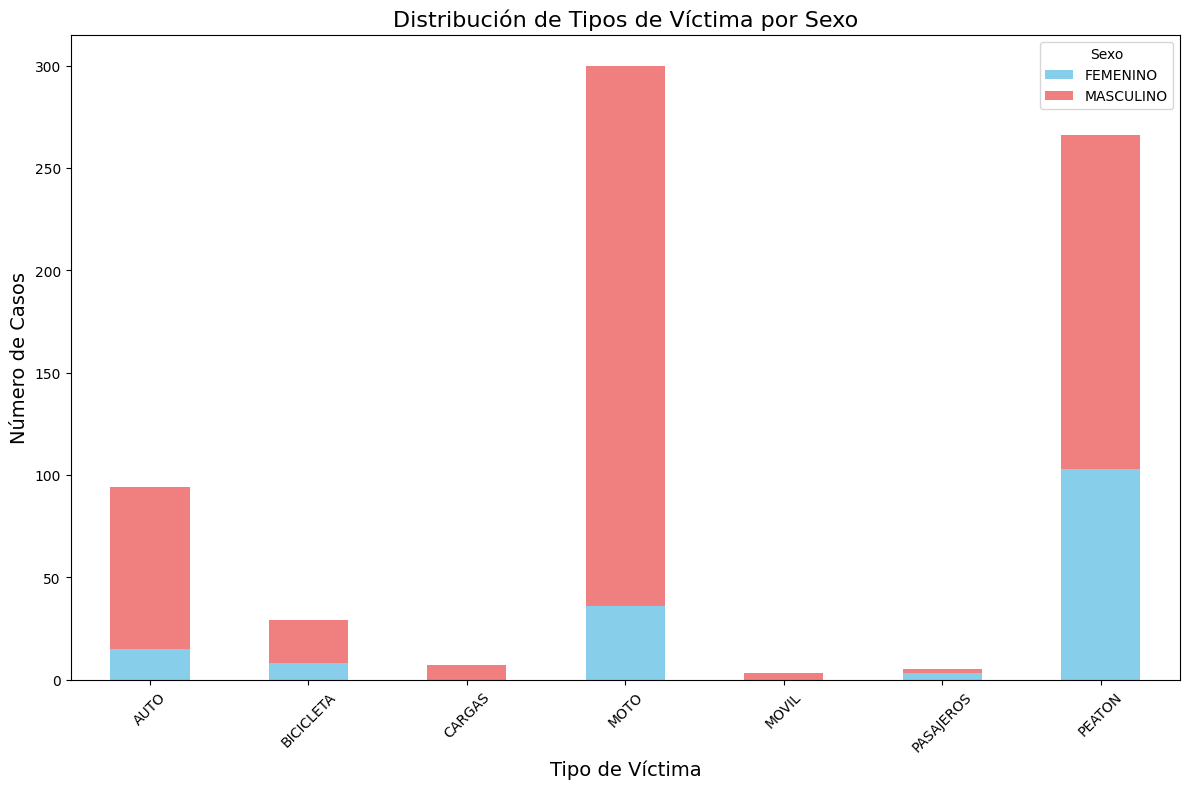

In [263]:
# Crear un dataframe para la visualización por tipo de víctima y sexo
victim_type_sex_distribution = datavictimas.groupby(['VICTIMA', 'SEXO']).size().unstack(fill_value=0)

# Graficar
fig, ax = plt.subplots(figsize=(12, 8))
victim_type_sex_distribution.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'lightcoral', 'grey'])
ax.set_title('Distribución de Tipos de Víctima por Sexo', fontsize=16)
ax.set_xlabel('Tipo de Víctima', fontsize=14)
ax.set_ylabel('Número de Casos', fontsize=14)
ax.legend(title='Sexo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### la distribucion de victimas de hombres y mujeres son la mayoria de casos de hombres, el numero de casos crece un poco mas con las mujeres que son peatones 

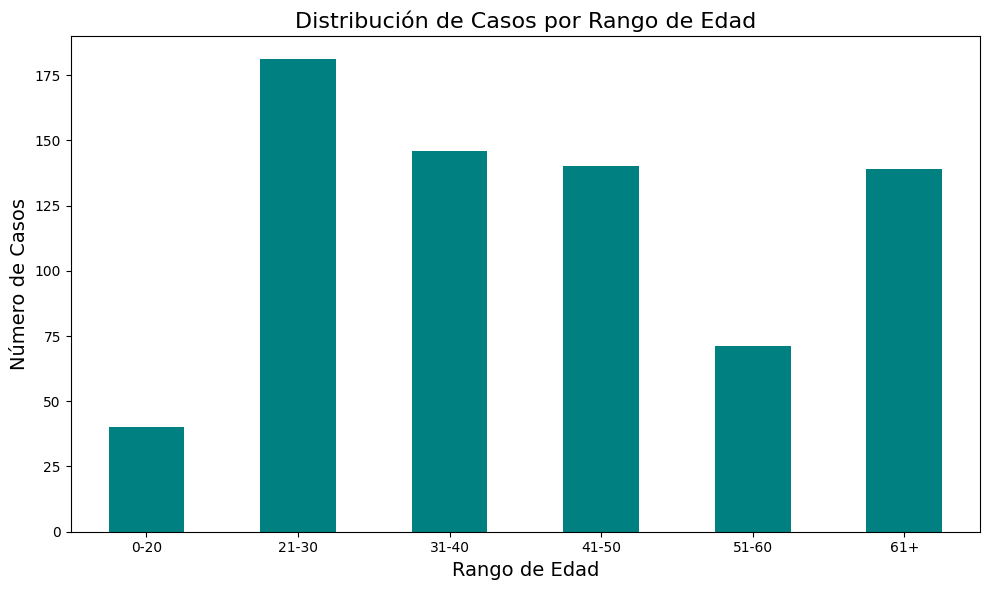

In [264]:
# Definir los rangos de edad
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Clasificar los datos en los rangos de edad
datavictimas['Age_Group'] = pd.cut(datavictimas['EDAD'], bins=bins, labels=labels, right=False)

# Calcular el número de casos en cada rango de edad
age_group_distribution = datavictimas['Age_Group'].value_counts().sort_index()

# Graficar
fig, ax = plt.subplots(figsize=(10, 6))
age_group_distribution.plot(kind='bar', ax=ax, color='teal')
ax.set_title('Distribución de Casos por Rango de Edad', fontsize=16)
ax.set_xlabel('Rango de Edad', fontsize=14)
ax.set_ylabel('Número de Casos', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### Se puede ver gracias a la grafica de arriba que las personas de 21-30 años son las que mas necesitan educacion vial ya que son las que mas chocan 

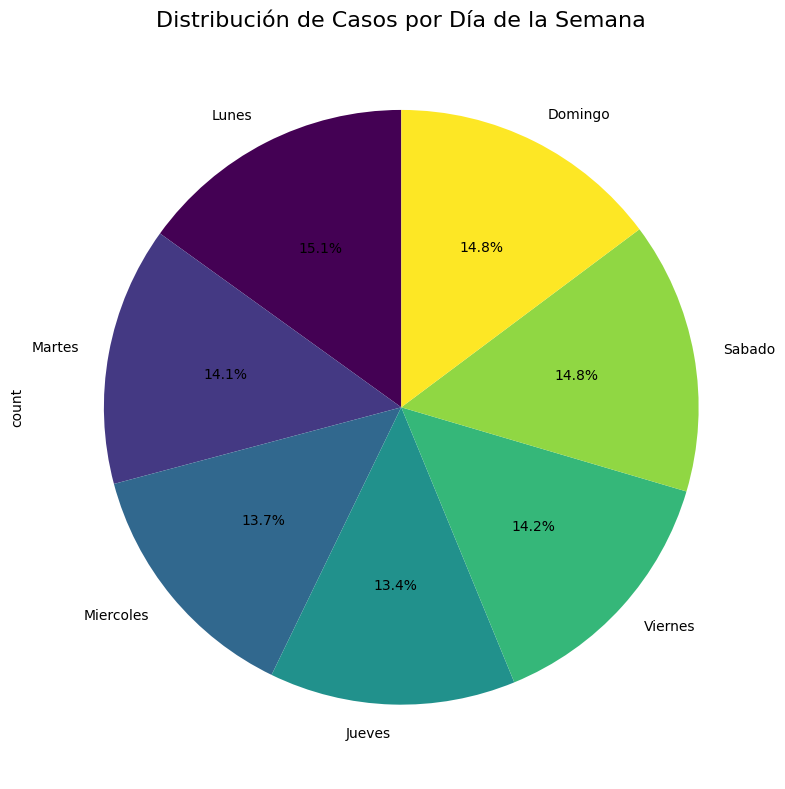

In [265]:
datavictimas['FECHA'] = pd.to_datetime(datavictimas['FECHA'], errors='coerce')

# Obtener el día de la semana de cada fecha (0 = Lunes, 6 = Domingo)
datavictimas['Day_of_Week'] = datavictimas['FECHA'].dt.dayofweek

# Mapear los números a nombres de días
days_map = {0: 'Lunes', 1: 'Martes', 2: 'Miercoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sabado', 6: 'Domingo'}
datavictimas['Días de la Semana'] = datavictimas['Day_of_Week'].map(days_map)  # Crear nueva columna con nombres de días

# Contar el número de casos por día de la semana
weekday_distribution = datavictimas['Días de la Semana'].value_counts().reindex(days_map.values())

# Graficar con un pie chart
fig, ax = plt.subplots(figsize=(8, 8))
weekday_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('viridis')(np.linspace(0, 1, 7)))
ax.set_title('Distribución de Casos por Día de la Semana', fontsize=16)
plt.tight_layout()
plt.show()

#### Gracias al grafico de pastel se puede visualizar que casi da igual el dia de la semana, todos los dias tienen un numero de casos muy parecidos

In [266]:
# Guardamos el DataFrame modificado en la nueva ruta
output_dir = 'data'
# Renombrar la columna 'ID_hecho' a 'ID' en el dataframe de víctimas
datavictimas.rename(columns={'ID_hecho': 'ID'}, inplace=True) 
output_file_path = os.path.join(output_dir, 'homicidios_victimas2.csv')
datavictimas.to_csv(output_file_path, index=False)

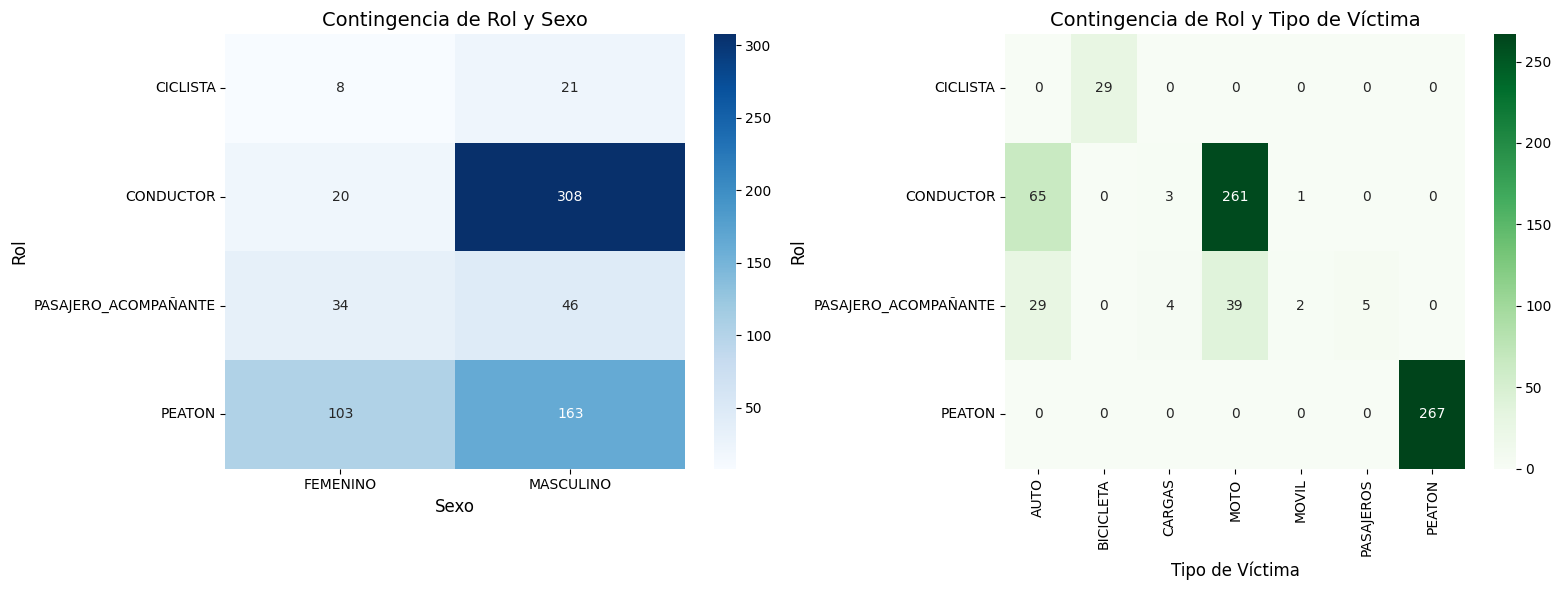

,count,mean,std,min,25%,50%,75%,max
ROL,,,,,,,,
CICLISTA,29.0,39.758621,18.391875,5.0,26.0,42.0,49.0,86.0
CONDUCTOR,330.0,35.069697,12.661047,17.0,26.0,32.0,42.0,84.0
PASAJERO_ACOMPAÑANTE,80.0,34.600000,16.095129,1.0,23.0,30.0,42.0,81.0
PEATON,267.0,53.247191,21.209631,1.0,38.0,55.0,73.0,95.0


In [267]:

# Crear tablas de contingencia para 'ROL' con 'SEXO' y 'VICTIMA'
contingency_sex = pd.crosstab(datavictimas['ROL'], datavictimas['SEXO'])
contingency_victim = pd.crosstab(datavictimas['ROL'], datavictimas['VICTIMA'])

# Calcular estadísticas descriptivas de la edad por rol
age_by_role = datavictimas.groupby('ROL')['EDAD'].describe()

# Visualizar las tablas de contingencia como heatmaps para mejor visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(contingency_sex, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Contingencia de Rol y Sexo', fontsize=14)
axes[0].set_xlabel('Sexo', fontsize=12)
axes[0].set_ylabel('Rol', fontsize=12)

sns.heatmap(contingency_victim, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title('Contingencia de Rol y Tipo de Víctima', fontsize=14)
axes[1].set_xlabel('Tipo de Víctima', fontsize=12)
axes[1].set_ylabel('Rol', fontsize=12)

plt.tight_layout()
plt.show()

age_by_role


In [268]:
# Crear una tabla de contingencia para contar los casos por cada combinación de 'ROL' y 'VICTIMA'
contingency_table = pd.crosstab(datavictimas['ROL'], datavictimas['VICTIMA'])

contingency_table


VICTIMA,AUTO,BICICLETA,CARGAS,MOTO,MOVIL,PASAJEROS,PEATON
ROL,,,,,,,
CICLISTA,0,29,0,0,0,0,0
CONDUCTOR,65,0,3,261,1,0,0
PASAJERO_ACOMPAÑANTE,29,0,4,39,2,5,0
PEATON,0,0,0,0,0,0,267


In [269]:
from scipy.stats import chi2_contingency

# Realizar el test Chi-cuadrado de independencia
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value, dof, expected


(1491.5892188613077,
 3.0593367552059577e-306,
 18,
 array([[3.86666667e+00, 1.19290780e+00, 2.87943262e-01, 1.23404255e+01,
         1.23404255e-01, 2.05673759e-01, 1.09829787e+01],
        [4.40000000e+01, 1.35744681e+01, 3.27659574e+00, 1.40425532e+02,
         1.40425532e+00, 2.34042553e+00, 1.24978723e+02],
        [1.05333333e+01, 3.24964539e+00, 7.84397163e-01, 3.36170213e+01,
         3.36170213e-01, 5.60283688e-01, 2.99191489e+01],
        [3.56000000e+01, 1.09829787e+01, 2.65106383e+00, 1.13617021e+02,
         1.13617021e+00, 1.89361702e+00, 1.01119149e+02]]))

##### El test Chi-cuadrado de independencia aplicado a las variables ROL y VICTIMA ha dado como resultado un valor muy alto de chi-cuadrado y un valor p casi igual a cero. Esto sugiere que el tipo de víctima está significativamente influenciado por el rol de la persona implicada en el evento.

# **<center>ANALISIS EDA CSV HOMICIDIOS_HECHOS</center>**  

In [270]:
# Cargando el archivo CSV para exploración hechos
file_path1 = 'data/homicidios_hechos.csv'

datahechos = pd.read_csv(file_path1)

# Mostrar las primeras filas del dataframe y los nombres de las columnas
datahechos.head(), datahechos.columns


(          ID  N_VICTIMAS       FECHA  AAAA  MM  DD      HORA HH  \
 0  2016-0001           1  01/01/2016  2016   1   1  04:00:00  4   
 1  2016-0002           1  01/02/2016  2016   1   2  01:15:00  1   
 2  2016-0003           1  01/03/2016  2016   1   3  07:00:00  7   
 3  2016-0004           1  01/10/2016  2016   1  10  00:00:00  0   
 4  2016-0005           1   1/21/2016  2016   1  21  05:20:00  5   
 
                              LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  Altura  \
 0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  ...     NaN   
 1          AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ  ...     NaN   
 2                         AV ENTRE RIOS 2034       AVENIDA  ...  2034.0   
 3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       AVENIDA  ...     NaN   
 4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        AVENIDA  ...     NaN   
 
                                  Cruce  \
 0  FERNANDEZ DE LA CRUZ, F., GRAL. AV.   
 1                  DE LOS CORRALES AV.   
 2 

In [271]:
# Primero Remplazamos todos los SD por NA
datahechos.replace('SD', pd.NA, inplace=True)

# Show the first few rows of the modified dataframe
datahechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Direccion Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,01/01/2016,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,01/02/2016,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,01/03/2016,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,01/10/2016,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,<NA>
4,2016-0005,1,1/21/2016,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.6224663,MOTO-PASAJEROS,MOTO,PASAJEROS


In [272]:
# Group the data by 'COMUNA' and count the number of cases in each
casos_por_comuna = datahechos.groupby('COMUNA').size()

casos_por_comuna


COMUNA
0      2
1     90
2     25
3     45
4     76
5     22
6     21
7     60
8     65
9     73
10    29
11    32
12    37
13    40
14    35
15    44
dtype: int64

In [273]:
# Remove rows where 'COMUNA' is equal to 0
datahechos2 = datahechos[datahechos['COMUNA'] != 0]

# Group the data by 'COMUNA' and count the number of cases in each
casos_por_comuna = datahechos2.groupby('COMUNA').size()

casos_por_comuna


COMUNA
1     90
2     25
3     45
4     76
5     22
6     21
7     60
8     65
9     73
10    29
11    32
12    37
13    40
14    35
15    44
dtype: int64

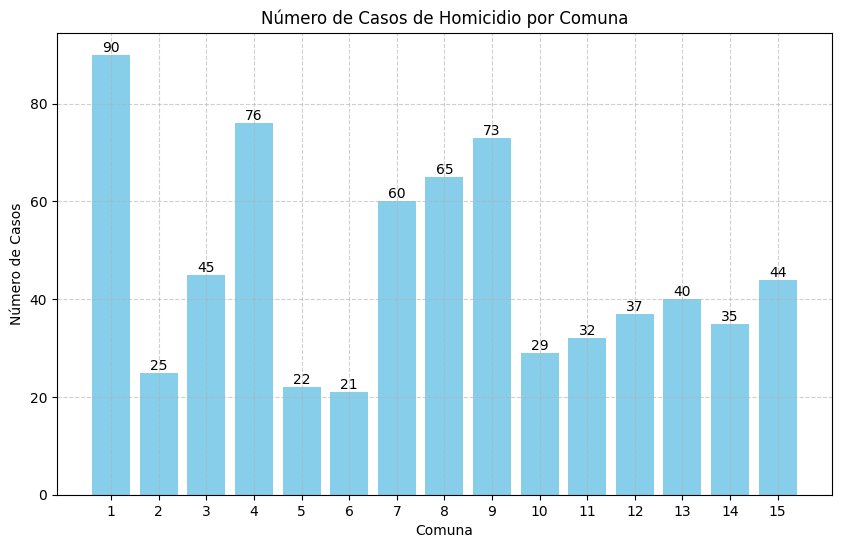

In [274]:
# Group the filtered data by 'COMUNA' and count the number of cases in each
casos_por_comuna_filtered = datahechos2.groupby('COMUNA').size()

# Plotting the number of cases per Comuna with data labels
plt.figure(figsize=(10, 6))
bars = plt.bar(casos_por_comuna_filtered.index.astype(str), casos_por_comuna_filtered, color='skyblue')
plt.title('Número de Casos de Homicidio por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Casos')
plt.grid(True, linestyle='--', alpha=0.6)

# Adding the data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()


#### En la grafica de arriba se puede visualizar que la comuna con mayor numero de casos, es la 1 seguido de la numero 4 y 9. A lo largo de todos los años

In [275]:
# Display the first few entries of the 'TIPO_DE_CALLE' column to inspect its content
datahechos2['TIPO_DE_CALLE'].head()


0     AVENIDA
1    GRAL PAZ
2     AVENIDA
3     AVENIDA
4     AVENIDA
Name: TIPO_DE_CALLE, dtype: object

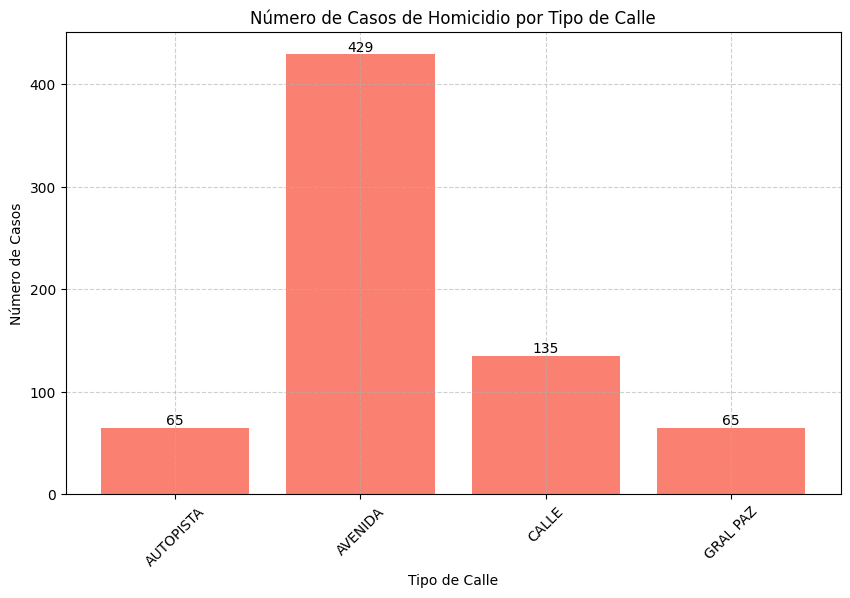

In [276]:
# Group the filtered data by 'TIPO_DE_CALLE' and count the number of cases in each
casos_por_tipo_calle = datahechos2.groupby('TIPO_DE_CALLE').size()

# Plotting the number of cases per type of street with data labels
plt.figure(figsize=(10, 6))
bars = plt.bar(casos_por_tipo_calle.index, casos_por_tipo_calle, color='salmon')
plt.title('Número de Casos de Homicidio por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Número de Casos')
plt.grid(True, linestyle='--', alpha=0.6)

# Adding the data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


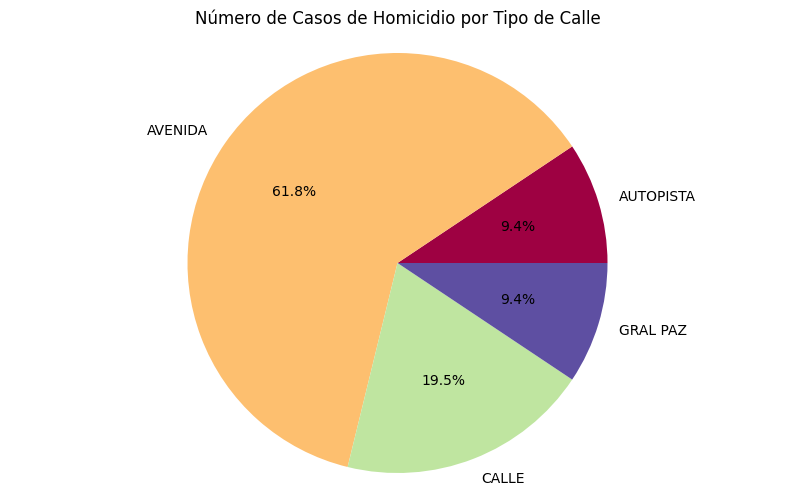

In [286]:
# Gráfico de Pastel
plt.figure(figsize=(10, 6))
plt.pie(casos_por_tipo_calle, labels=casos_por_tipo_calle.index, autopct='%1.1f%%', colors=plt.cm.Spectral(np.linspace(0, 1, len(casos_por_tipo_calle))))
plt.title('Número de Casos de Homicidio por Tipo de Calle')
plt.axis('equal')  # Asegura que el pastel sea un círculo
plt.show()

## Hay mayor cantidad de accidentes en avenidas,que en los otros tipos de calle. 

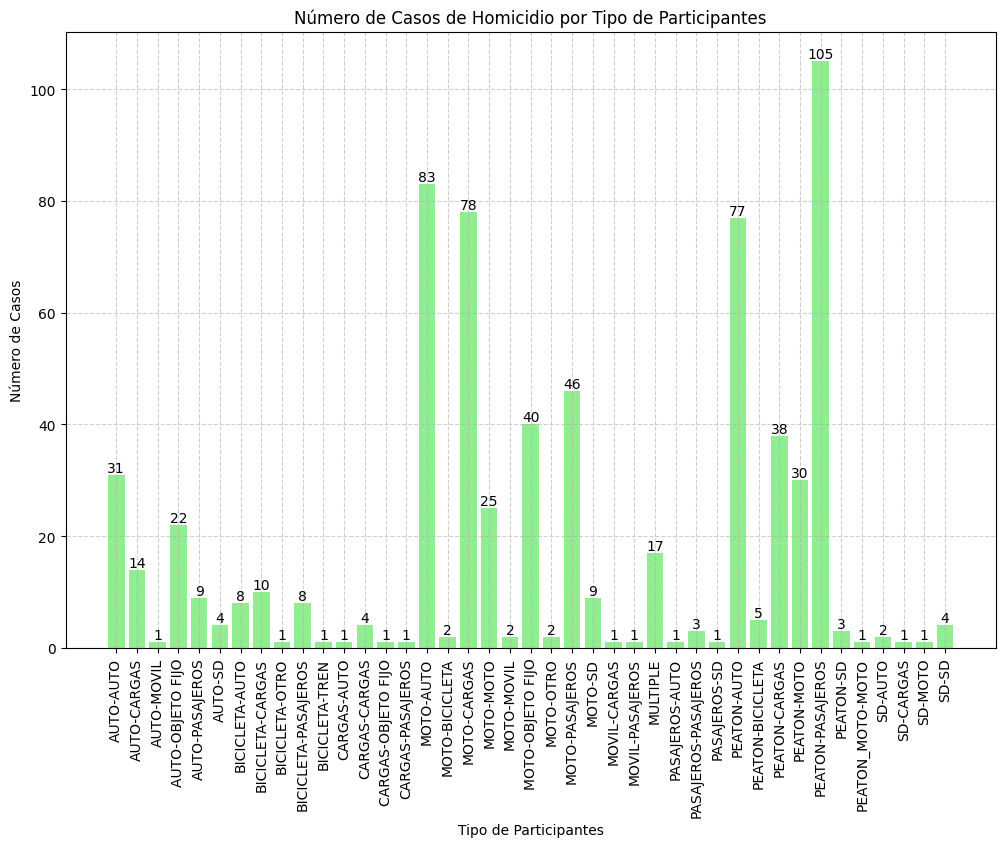

In [287]:
# Group the filtered data by 'PARTICIPANTES' and count the number of cases in each
casos_por_participantes = datahechos2.groupby('PARTICIPANTES').size()

# Plotting the number of cases per participant category with data labels
plt.figure(figsize=(12, 8))
bars = plt.bar(casos_por_participantes.index, casos_por_participantes, color='lightgreen')
plt.title('Número de Casos de Homicidio por Tipo de Participantes')
plt.xlabel('Tipo de Participantes')
plt.ylabel('Número de Casos')
plt.grid(True, linestyle='--', alpha=0.6)

# Adding the data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xticks(rotation=90)  # Rotate labels to avoid overlap
plt.show()


## En el grafico de arriba se puede visualizar que el peaton-pasajero y moto-auto tiene el mayor numero de casos

In [288]:

def asignar_momento_dia(hora_str):
    if pd.notnull(hora_str):
        try:
            hora = datetime.strptime(hora_str, '%H:%M:%S').time()
            if 6 <= hora.hour < 12:
                return "Mañana"
            elif 12 <= hora.hour < 18:
                return "Tarde"
            elif 18 <= hora.hour < 24:
                return "Noche"
            else:
                return "Madrugada"
        except ValueError:
            return "Sin Dato"
    else:
        return "Sin Dato"

# Applying the function to create a new column 'Momento del día'
datahechos2['Momento del dia'] = datahechos2['HORA'].apply(asignar_momento_dia)

# Displaying the first few rows to verify the application of the function
datahechos2[['HORA', 'Momento del dia']].head()

C:\Users\Edgar\AppData\Local\Temp\ipykernel_23244\3629559283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datahechos2['Momento del dia'] = datahechos2['HORA'].apply(asignar_momento_dia)


,HORA,Momento del dia
0,04:00:00,Madrugada
1,01:15:00,Madrugada
2,07:00:00,Mañana
3,00:00:00,Madrugada
4,05:20:00,Madrugada


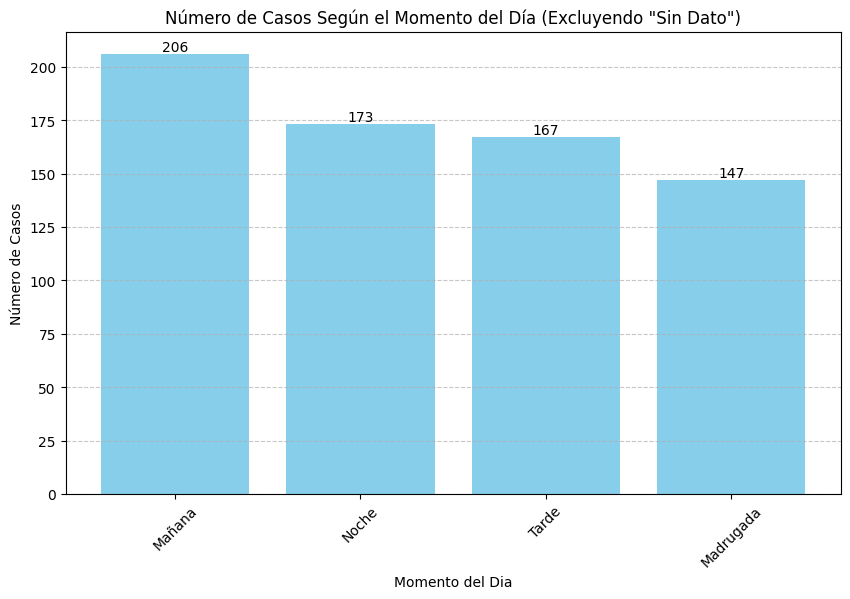

In [289]:
momento_counts = datahechos2['Momento del dia'].value_counts()
# Exclude the 'Sin Dato' category from the count data
momento_counts_filtered = momento_counts.drop('Sin Dato', errors='ignore')  # Use errors='ignore' in case 'Sin Dato' is not in the index

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(momento_counts_filtered.index, momento_counts_filtered.values, color='skyblue')
plt.title('Número de Casos Según el Momento del Día (Excluyendo "Sin Dato")')
plt.xlabel('Momento del Dia')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')  # Position text inside the bars

plt.show()


## Se puede ver gracias a la grafica, que el numero de sinestros es mayor en las mañanas 

In [290]:
# Check for any non-standard entries that could not be converted to float
non_standard_entries = datahechos2[datahechos2['XY (CABA)'].str.contains(r'[^0-9\.\s,()]', regex=True)]
non_standard_entries[['XY (CABA)']].head()


,XY (CABA)
0,Point (98896.78238426 93532.43437792)
1,Point (95832.05571093 95505.41641999)
2,Point (106684.29090040 99706.57687843)
3,Point (99840.65224780 94269.16534422)
4,Point (106980.32827929 100752.16915795)


C:\Users\Edgar\AppData\Local\Temp\ipykernel_23244\377303683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datahechos2['Momento del dia Numeric'] = datahechos2['Momento del dia'].map(momento_del_dia_mapping)


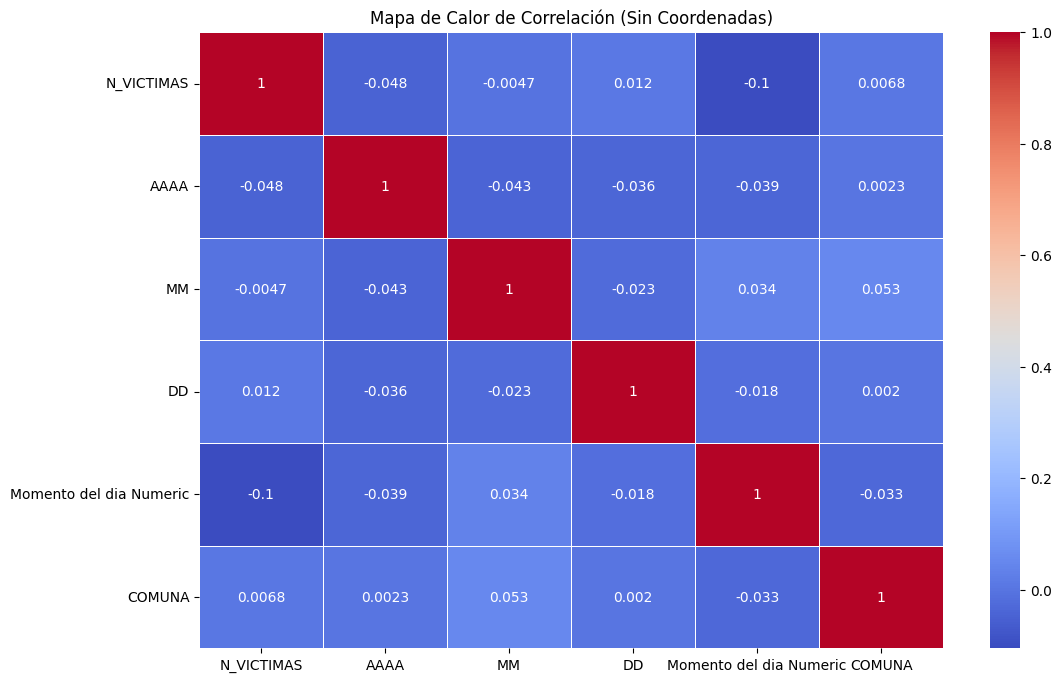

In [291]:
# Mapping categorical data to numeric for correlation matrix
momento_del_dia_mapping = {'Madrugada': 0, 'Mañana': 1, 'Tarde': 2, 'Noche': 3}
datahechos2['Momento del dia Numeric'] = datahechos2['Momento del dia'].map(momento_del_dia_mapping)

# Revising the dataframe columns for heatmap without 'pos x' and 'pos y'
columnas_mapa_calor = ['N_VICTIMAS', 'AAAA', 'MM', 'DD', 'Momento del dia Numeric', 'COMUNA']
df_mapa_calor = datahechos2[columnas_mapa_calor].dropna()  # Dropping rows with NaNs

# Creating the correlation matrix for the revised DataFrame
matriz_correlacion = df_mapa_calor.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Mapa de Calor de Correlación (Sin Coordenadas)")
plt.show()


In [292]:
# Check and create output directory if necessary
output_dir = 'data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Assuming datahechos2 is your DataFrame, and it has a column named 'Altura'
# First, ensure that the column exists to avoid errors
if 'Altura' in datahechos2.columns:
    datahechos2.drop(columns='Altura', inplace=True)

# Set the path for the output file
output_file_path = os.path.join(output_dir, 'homicidios_hechos3.csv')

# Save the DataFrame to CSV
datahechos2.to_csv(output_file_path, index=False)


C:\Users\Edgar\AppData\Local\Temp\ipykernel_23244\3976208078.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datahechos2.drop(columns='Altura', inplace=True)


In [293]:
output_file_path

'data\\homicidios_hechos3.csv'

# **<center>ANALISIS EDA CSV LESIONES_COMBINADO</center>**  

In [294]:
# Perform initial analysis of the columns
column_analysis = {
    'Column Name': lesiones_combinado.columns,
    'Data Type': lesiones_combinado.dtypes,
    'Missing Values': lesiones_combinado.isnull().sum(),
    'Unique Values': lesiones_combinado.nunique()
}

column_analysis_df = pd.DataFrame(column_analysis)
print(column_analysis_df)

column_analysis_df

                           Column Name Data Type  Missing Values  \
id                                  id    object               0   
n_victimas                  n_victimas     int64               0   
aaaa                              aaaa     int64               0   
mm                                  mm     int64               0   
dd                                  dd     int64               0   
hora                              hora    object               0   
comuna                          comuna    object             178   
longitud                      longitud    object             270   
latutid                        latutid    object             270   
victima                        victima    object               0   
acusado                        acusado    object               0   
participantes            participantes    object               0   
moto                              moto    object              92   
auto                              auto    object

,Column Name,Data Type,Missing Values,Unique Values
id,id,object,0,23781
n_victimas,n_victimas,int64,0,10
aaaa,aaaa,int64,0,3
mm,mm,int64,0,12
dd,dd,int64,0,31
hora,hora,object,0,2000
comuna,comuna,object,178,17
longitud,longitud,object,270,13810
latutid,latutid,object,270,13757
victima,victima,object,0,14


In [295]:
 # Convert specific columns to boolean where 'SD' is False and 'x' is True
columns_to_convert = ['moto', 'auto', 'transporte_publico', 'camion', 'ciclista']

for column in columns_to_convert:
    lesiones_combinado[column] = lesiones_combinado[column].apply(lambda x: True if x == 'x' else False if x == 'SD' else None)

# Display the updated DataFrame
updated_columns  = lesiones_combinado[columns_to_convert].head()
updated_columns 

,moto,auto,transporte_publico,camion,ciclista
0,False,False,False,False,True
1,False,True,False,False,False
2,False,False,False,False,False
3,True,False,False,False,False
4,False,False,True,False,False


In [296]:
lesiones_combinado

,id,n_victimas,aaaa,mm,dd,hora,comuna,longitud,latutid,victima,...,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA
0,LC-2019-0000179,1,2019,1,1,9:00,14,-58.408911,-34.559658,CICLISTA,...,CICLISTA-SD,False,False,False,False,True,SD,sd,SD,SD
1,LC-2019-0000053,1,2019,1,1,1:55,8,-58.44351,-34.669125,AUTO,...,AUTO-SD,False,True,False,False,False,SD,sd,Varon,57
2,LC-2019-0000063,1,2019,1,1,2:00,8,-58.468335,-34.677556,SD,...,SD-SD,False,False,False,False,False,SD,sd,SD,SD
3,LC-2019-0000079,1,2019,1,1,2:30,7,-58.437425,-34.647349,PEATON,...,PEATON-SD,True,False,False,False,False,SD,sd,Varon,SD
4,LC-2019-0000082,4,2019,1,1,4:30,3,-58.398225,-34.604579,AUTO,...,AUTO-SD,False,False,True,False,False,SD,sd,Varon,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27593,LC-2021-0652865,2,2021,12,31,19:40,9,-58.488326609395,-34.641753304864,SD,...,SD-SD,False,False,False,False,False,SD,SD,Varon,28
27594,LC-2021-0652865,2,2021,12,31,19:40,9,-58.488326609395,-34.641753304864,SD,...,SD-SD,False,False,False,False,False,SD,SD,Varon,52
27595,LC-2021-0652907,1,2021,12,31,20:00,1,-58.382894,-34.583083,SD,...,SD-SD,False,False,False,False,False,SD,SD,Varon,23
27596,LC-2021-0652921,1,2021,12,31,22:00,5,-58.414532050899,-34.614288229345,MOTO,...,MOTO-TRANSPORTE PUBLICO,True,None,True,None,None,GRAVE,MOTO,Varon,31


In [297]:
# Define the function to assign time of day based on hour with the correct format
def asignar_momento_dia(hora_str):
    if pd.notnull(hora_str):
        try:
            hora = datetime.strptime(hora_str, '%H:%M').time()
            if 6 <= hora.hour < 12:
                return "Mañana"
            elif 12 <= hora.hour < 18:
                return "Tarde"
            elif 18 <= hora.hour < 24:
                return "Noche"
            else:
                return "Madrugada"
        except ValueError:
            return "Sin Dato"
    else:
        return "Sin Dato"

# Applying the function to create a new column 'Momento del día'
lesiones_combinado['Momento del dia'] = lesiones_combinado['hora'].apply(asignar_momento_dia)

# Displaying the first few rows to verify the application of the function
momentos_dia = lesiones_combinado[['hora', 'Momento del dia']].head()
momentos_dia

,hora,Momento del dia
0,9:00,Mañana
1,1:55,Madrugada
2,2:00,Madrugada
3,2:30,Madrugada
4,4:30,Madrugada


In [298]:
lesiones_combinado

,id,n_victimas,aaaa,mm,dd,hora,comuna,longitud,latutid,victima,...,moto,auto,transporte_publico,camion,ciclista,gravedad,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,Momento del dia
0,LC-2019-0000179,1,2019,1,1,9:00,14,-58.408911,-34.559658,CICLISTA,...,False,False,False,False,True,SD,sd,SD,SD,Mañana
1,LC-2019-0000053,1,2019,1,1,1:55,8,-58.44351,-34.669125,AUTO,...,False,True,False,False,False,SD,sd,Varon,57,Madrugada
2,LC-2019-0000063,1,2019,1,1,2:00,8,-58.468335,-34.677556,SD,...,False,False,False,False,False,SD,sd,SD,SD,Madrugada
3,LC-2019-0000079,1,2019,1,1,2:30,7,-58.437425,-34.647349,PEATON,...,True,False,False,False,False,SD,sd,Varon,SD,Madrugada
4,LC-2019-0000082,4,2019,1,1,4:30,3,-58.398225,-34.604579,AUTO,...,False,False,True,False,False,SD,sd,Varon,45,Madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27593,LC-2021-0652865,2,2021,12,31,19:40,9,-58.488326609395,-34.641753304864,SD,...,False,False,False,False,False,SD,SD,Varon,28,Noche
27594,LC-2021-0652865,2,2021,12,31,19:40,9,-58.488326609395,-34.641753304864,SD,...,False,False,False,False,False,SD,SD,Varon,52,Noche
27595,LC-2021-0652907,1,2021,12,31,20:00,1,-58.382894,-34.583083,SD,...,False,False,False,False,False,SD,SD,Varon,23,Noche
27596,LC-2021-0652921,1,2021,12,31,22:00,5,-58.414532050899,-34.614288229345,MOTO,...,True,None,True,None,None,GRAVE,MOTO,Varon,31,Noche


In [299]:
# Suma del número de víctimas por año
victims_by_year = lesiones_combinado.groupby('aaaa')['n_victimas'].sum().reset_index()
print("Suma del número de víctimas por año:")
print(victims_by_year)

# Suma del número de víctimas por momento del día
victims_by_time_of_day = lesiones_combinado.groupby('Momento del dia')['n_victimas'].sum().reset_index()
print("\nSuma del número de víctimas por momento del día:")
print(victims_by_time_of_day)

Suma del número de víctimas por año:
   aaaa  n_victimas
0  2019       17124
1  2020        9440
2  2021       12694

Suma del número de víctimas por momento del día:
  Momento del dia  n_victimas
0       Madrugada        2938
1          Mañana        7456
2           Noche        7810
3        Sin Dato        8944
4           Tarde       12110


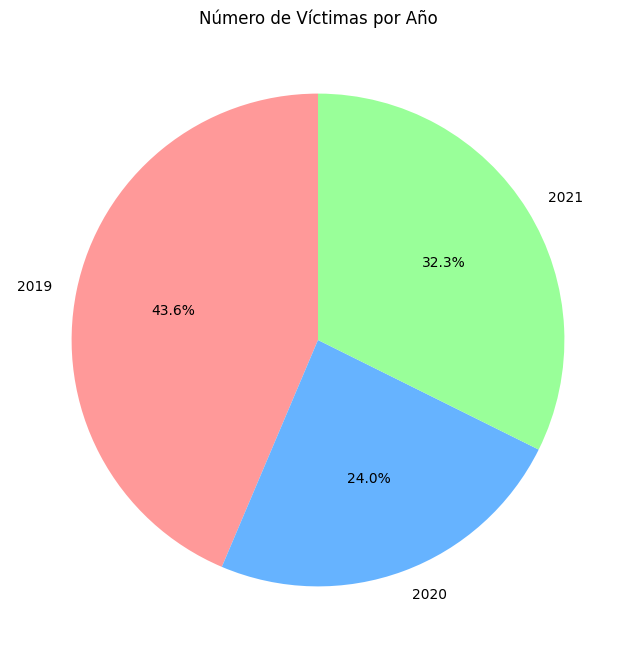

In [301]:
# Suponiendo que ya has cargado el archivo CSV en la variable `data`

# Suma del número de víctimas por año
victims_by_year = lesiones_combinado.groupby('aaaa')['n_victimas'].sum()

# Suma del número de víctimas por momento del día
victims_by_time_of_day = lesiones_combinado.groupby('Momento del dia')['n_victimas'].sum()

# Definir colores para la gráfica de pastel
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Gráfica de pastel para el número de víctimas por año
plt.figure(figsize=(8, 8))
plt.pie(victims_by_year, labels=victims_by_year.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(victims_by_year)])
plt.title('Número de Víctimas por Año')
plt.show()

## Se puede ver que el numero de victimas igual que de muertos, bajo mucho en el año 2020 por la pandemia

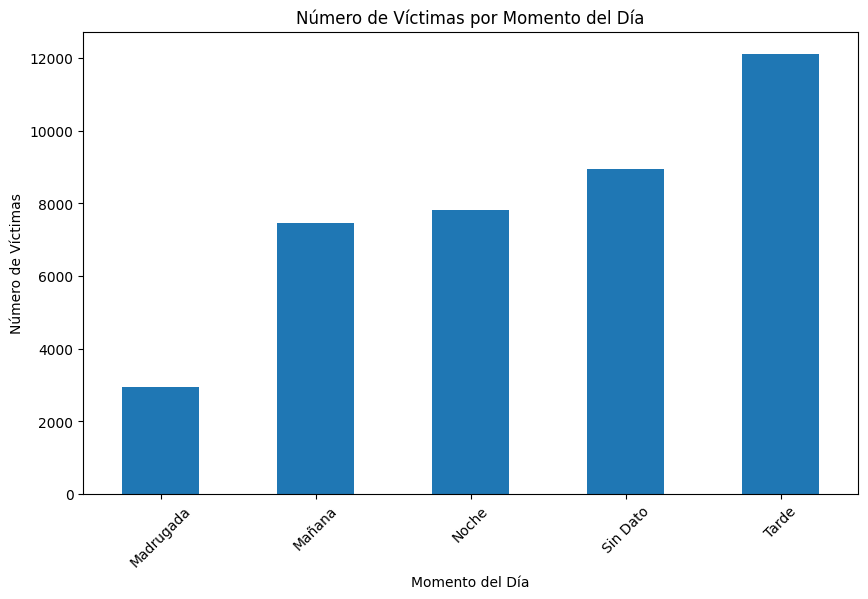

In [302]:
# Gráfica de barras para el número de víctimas por momento del día
plt.figure(figsize=(10, 6))
victims_by_time_of_day.plot(kind='bar')
plt.title('Número de Víctimas por Momento del Día')
plt.xlabel('Momento del Día')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)
plt.show()

## Se puede visualizar que el momento del dia con mayor numero de victimas es en la tarde

In [303]:
# Realizar un análisis del número de víctimas por comuna
victims_by_commune = lesiones_combinado.groupby('comuna')['n_victimas'].sum().reset_index()

# Mostrar los resultados
print(victims_by_commune)

             comuna  n_victimas
0                 1        3762
1                10        2084
2                11        2170
3                12        2661
4                13        2162
5                14        2425
6                15        3004
7                 2        1318
8                 3        2621
9                 4        3402
10                5        1850
11                6        1618
12                7        2543
13                8        2175
14                9        3359
15  No Especificada         696
16               SD        1208


    comuna  n_victimas
0      1.0        3762
1      2.0        1318
2      3.0        2621
3      4.0        3402
4      5.0        1850
5      6.0        1618
6      7.0        2543
7      8.0        2175
8      9.0        3359
9     10.0        2084
10    11.0        2170
11    12.0        2661
12    13.0        2162
13    14.0        2425
14    15.0        3004


C:\Users\Edgar\AppData\Local\Temp\ipykernel_23244\3084028358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['comuna'] = pd.to_numeric(filtered_data['comuna'], errors='coerce')


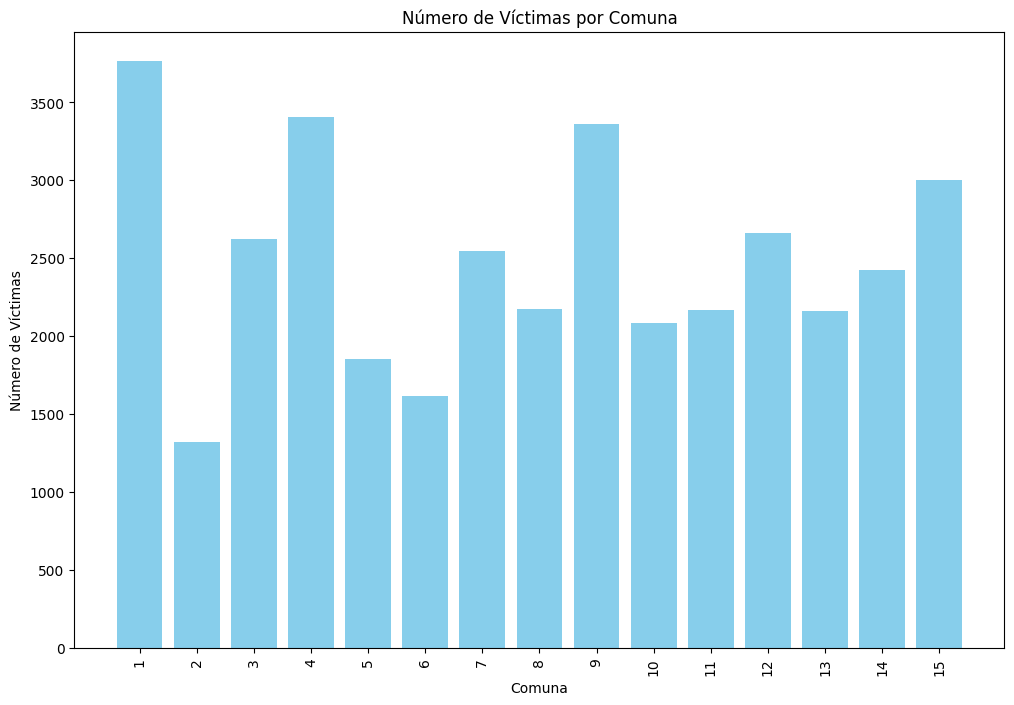

In [304]:

# Filtrar las comunas con valores "SD" y "No Especificada"
filtered_data = lesiones_combinado[~lesiones_combinado['comuna'].isin(['SD', 'No Especificada'])]

# Convertir la columna 'comuna' a numérica
filtered_data['comuna'] = pd.to_numeric(filtered_data['comuna'], errors='coerce')

# Filtrar solo las comunas del 1 al 15
filtered_data = filtered_data[filtered_data['comuna'].between(1, 15)]

# Realizar un análisis del número de víctimas por comuna
victims_by_commune = filtered_data.groupby('comuna')['n_victimas'].sum().reset_index()

# Ordenar las comunas numéricamente
victims_by_commune = victims_by_commune.sort_values(by='comuna')

# Mostrar los resultados
print(victims_by_commune)

# Graficar el número de víctimas por comuna
plt.figure(figsize=(12, 8))
plt.bar(victims_by_commune['comuna'].astype(int).astype(str), victims_by_commune['n_victimas'], color='skyblue')
plt.title('Número de Víctimas por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=90)
plt.show()


## Se puede visualizar que la comuna 1 tiene el mayor numero de victimas

In [222]:
# Filtrar filas donde cualquiera de las columnas especificadas sea TRUE
columns_to_check = ['moto', 'auto', 'transporte_publico', 'camion', 'ciclista']
filtered_victims = lesiones_combinado[lesiones_combinado[columns_to_check].any(axis=1)]

# Sumar el número de víctimas en las filas filtradas
total_victims_true = filtered_victims['n_victimas'].sum()

# Mostrar el total de víctimas
print(f"Total de víctimas cuando las columnas {columns_to_check} son TRUE: {total_victims_true}")


Total de víctimas cuando las columnas ['moto', 'auto', 'transporte_publico', 'camion', 'ciclista'] son TRUE: 25804


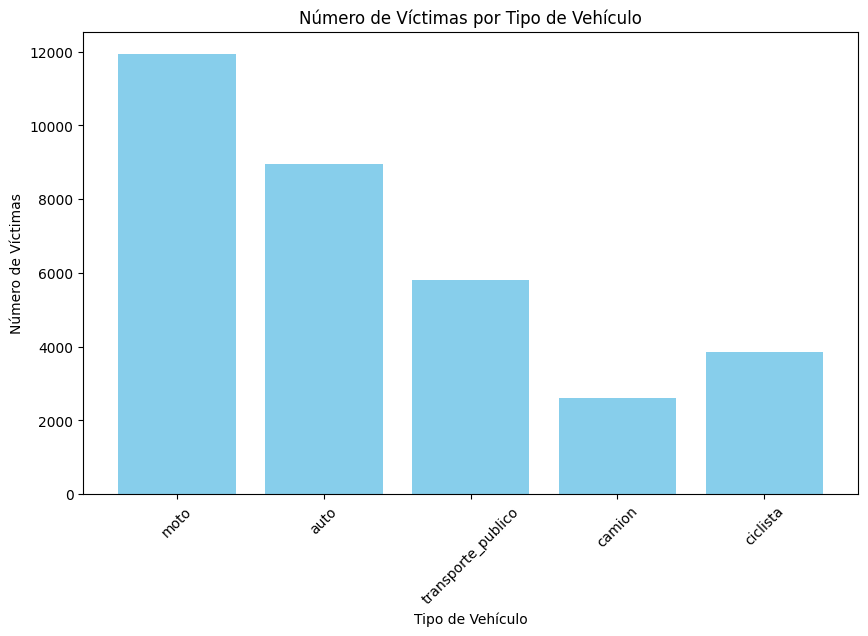

     Tipo de Vehículo  Número de Víctimas
0                moto               11936
1                auto                8967
2  transporte_publico                5811
3              camion                2600
4            ciclista                3843


In [305]:
# Definir las columnas a verificar
columns_to_check = ['moto', 'auto', 'transporte_publico', 'camion', 'ciclista']

# Crear un diccionario para almacenar la suma de víctimas para cada columna
victims_count = {}

# Calcular la suma de víctimas para cada columna donde el valor es True
for column in columns_to_check:
    victims_count[column] = lesiones_combinado[lesiones_combinado[column] == True]['n_victimas'].sum()

# Convertir el diccionario a un DataFrame para facilitar la visualización
victims_count_df = pd.DataFrame(list(victims_count.items()), columns=['Tipo de Vehículo', 'Número de Víctimas'])

# Graficar el número de víctimas para cada tipo de vehículo
plt.figure(figsize=(10, 6))
plt.bar(victims_count_df['Tipo de Vehículo'], victims_count_df['Número de Víctimas'], color='skyblue')
plt.title('Número de Víctimas por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)
plt.show()

# Mostrar el DataFrame con los resultados
print(victims_count_df)


## Se puede visualizar que la moto es el tipo de vehiculo con mayor numero de victimas

In [306]:
lesiones_combinado

,id,n_victimas,aaaa,mm,dd,hora,comuna,longitud,latutid,victima,...,moto,auto,transporte_publico,camion,ciclista,gravedad,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,Momento del dia
0,LC-2019-0000179,1,2019,1,1,9:00,14,-58.408911,-34.559658,CICLISTA,...,False,False,False,False,True,SD,sd,SD,SD,Mañana
1,LC-2019-0000053,1,2019,1,1,1:55,8,-58.44351,-34.669125,AUTO,...,False,True,False,False,False,SD,sd,Varon,57,Madrugada
2,LC-2019-0000063,1,2019,1,1,2:00,8,-58.468335,-34.677556,SD,...,False,False,False,False,False,SD,sd,SD,SD,Madrugada
3,LC-2019-0000079,1,2019,1,1,2:30,7,-58.437425,-34.647349,PEATON,...,True,False,False,False,False,SD,sd,Varon,SD,Madrugada
4,LC-2019-0000082,4,2019,1,1,4:30,3,-58.398225,-34.604579,AUTO,...,False,False,True,False,False,SD,sd,Varon,45,Madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27593,LC-2021-0652865,2,2021,12,31,19:40,9,-58.488326609395,-34.641753304864,SD,...,False,False,False,False,False,SD,SD,Varon,28,Noche
27594,LC-2021-0652865,2,2021,12,31,19:40,9,-58.488326609395,-34.641753304864,SD,...,False,False,False,False,False,SD,SD,Varon,52,Noche
27595,LC-2021-0652907,1,2021,12,31,20:00,1,-58.382894,-34.583083,SD,...,False,False,False,False,False,SD,SD,Varon,23,Noche
27596,LC-2021-0652921,1,2021,12,31,22:00,5,-58.414532050899,-34.614288229345,MOTO,...,True,None,True,None,None,GRAVE,MOTO,Varon,31,Noche


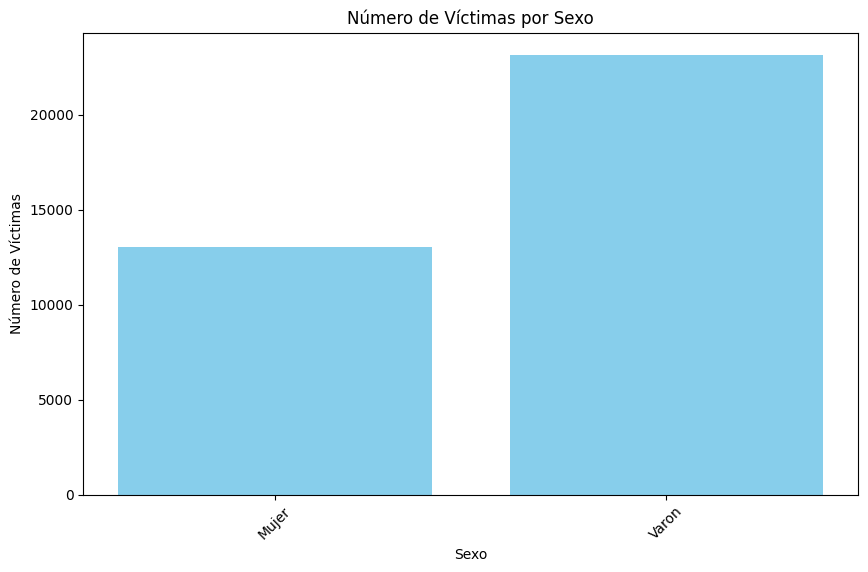

    SEXO  n_victimas
0  Mujer       13016
1  Varon       23164


In [307]:
# Estandarizar los valores en la columna 'SEXO'
lesiones_combinado['SEXO'] = lesiones_combinado['SEXO'].str.capitalize()

# Filtrar los valores no deseados
filtered_data = lesiones_combinado[lesiones_combinado['SEXO'].isin(['Mujer', 'Varon'])]

# Calcular el número de víctimas por sexo
victims_by_sex = filtered_data.groupby('SEXO')['n_victimas'].sum().reset_index()

# Graficar el número de víctimas por sexo
plt.figure(figsize=(10, 6))
plt.bar(victims_by_sex['SEXO'], victims_by_sex['n_victimas'], color='skyblue')
plt.title('Número de Víctimas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)
plt.show()

# Mostrar el DataFrame con los resultados
print(victims_by_sex)


## Se puede visualizar que los varones son el sexo con mayor numero de victimas

In [308]:
# Convertir la columna 'EDAD_VICTIMA' a entero
lesiones_combinado['EDAD_VICTIMA'] = pd.to_numeric(lesiones_combinado['EDAD_VICTIMA'], errors='coerce').astype('Int64')

# Obtener los valores únicos y contar los valores únicos
unique_ages = lesiones_combinado['EDAD_VICTIMA'].unique()
unique_ages_count = lesiones_combinado['EDAD_VICTIMA'].nunique()

# Calcular la edad promedio
average_age = lesiones_combinado['EDAD_VICTIMA'].mean()

# Crear un DataFrame para mostrar los resultados
age_analysis_result = pd.DataFrame({
    'Unique Ages Count': [unique_ages_count],
    'Average Age': [average_age]
})

# Mostrar los resultados
print("Valores únicos de 'EDAD_VICTIMA':", unique_ages)
print("Conteo de valores únicos de 'EDAD_VICTIMA':", unique_ages_count)
print("Edad promedio de las víctimas:", average_age)
print("\nAnálisis de Edad de Víctimas:")
print(age_analysis_result)


Valores únicos de 'EDAD_VICTIMA': <IntegerArray>
[<NA>,   57,   45,   27,   32,   21,   37,   33,   25,   23,   42,   53,    1,
   62,   67,   75,   52,   40,   48,    3,   49,   50,   34,   44,   28,   59,
   73,   51,   16,   43,   38,   64,   36,   84,   22,   26,   20,    5,   39,
   56,   69,   55,   46,   29,   41,   74,   54,   70,    6,   30,   12,   83,
   24,   35,   68,   15,   19,    9,    2,   13,   18,   31,   17,   58,   60,
   47,    7,   63,   66,   80,   65,   71,   79,   85,   61,   77,   90,   76,
   89,   78,   91,   97,   10,   72,   88,   11,   81,    8,   14,   96,   82,
   87,   86,    4,   92,   94,  100,    0,   93,   95]
Length: 100, dtype: Int64
Conteo de valores únicos de 'EDAD_VICTIMA': 99
Edad promedio de las víctimas: 37.725688589095

Análisis de Edad de Víctimas:
   Unique Ages Count  Average Age
0                 99    37.725689


C:\Users\Edgar\AppData\Local\Temp\ipykernel_23244\280404590.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  victims_by_age_interval = lesiones_combinado.groupby('age_interval')['n_victimas'].sum().reset_index()


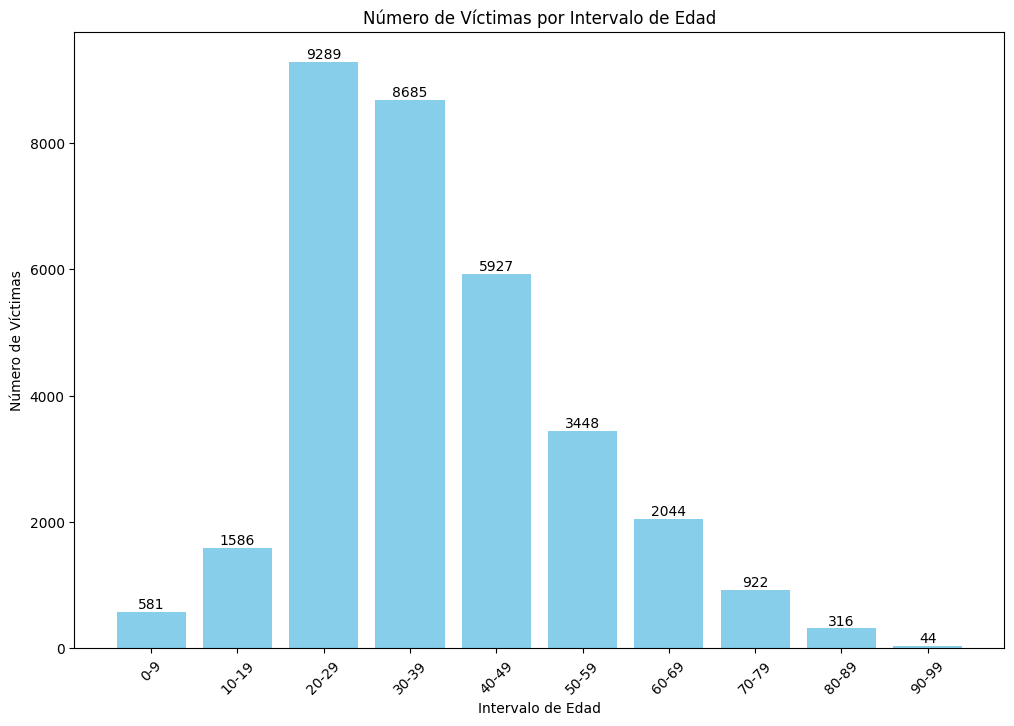

In [309]:
# Convertir la columna 'EDAD_VICTIMA' a entero
lesiones_combinado['EDAD_VICTIMA'] = pd.to_numeric(lesiones_combinado['EDAD_VICTIMA'], errors='coerce').astype('Int64')

# Crear intervalos de edades de 10 en 10
bins = list(range(0, 101, 10))
labels = [f'{i}-{i+9}' for i in bins[:-1]]

# Agrupar los datos de edad en intervalos
lesiones_combinado['age_interval'] = pd.cut(lesiones_combinado['EDAD_VICTIMA'], bins=bins, labels=labels, right=False)

# Calcular el número de víctimas para cada intervalo de edad
victims_by_age_interval = lesiones_combinado.groupby('age_interval')['n_victimas'].sum().reset_index()

# Graficar el número de víctimas por intervalo de edad
plt.figure(figsize=(12, 8))
bars = plt.bar(victims_by_age_interval['age_interval'], victims_by_age_interval['n_victimas'], color='skyblue')

# Añadir etiquetas con el número de víctimas
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.title('Número de Víctimas por Intervalo de Edad')
plt.xlabel('Intervalo de Edad')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)
plt.show()

## Se puede visualizar que el rango de edad de 20-29 tiene el mayor numero de victimas, seguido de 30-39

In [312]:
# Definir el nuevo path de destino
file_path5 = 'data/lesiones_combinado.csv'

# Guardar el archivo combinado en el nuevo path
lesiones_combinado.to_csv(file_path5, index=False)

In [313]:
lesiones_combinado

,id,n_victimas,aaaa,mm,dd,hora,comuna,longitud,latutid,victima,...,auto,transporte_publico,camion,ciclista,gravedad,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,Momento del dia,age_interval
0,LC-2019-0000179,1,2019,1,1,9:00,14,-58.408911,-34.559658,CICLISTA,...,False,False,False,True,SD,sd,Sd,<NA>,Mañana,NaN
1,LC-2019-0000053,1,2019,1,1,1:55,8,-58.44351,-34.669125,AUTO,...,True,False,False,False,SD,sd,Varon,57,Madrugada,50-59
2,LC-2019-0000063,1,2019,1,1,2:00,8,-58.468335,-34.677556,SD,...,False,False,False,False,SD,sd,Sd,<NA>,Madrugada,NaN
3,LC-2019-0000079,1,2019,1,1,2:30,7,-58.437425,-34.647349,PEATON,...,False,False,False,False,SD,sd,Varon,<NA>,Madrugada,NaN
4,LC-2019-0000082,4,2019,1,1,4:30,3,-58.398225,-34.604579,AUTO,...,False,True,False,False,SD,sd,Varon,45,Madrugada,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27593,LC-2021-0652865,2,2021,12,31,19:40,9,-58.488326609395,-34.641753304864,SD,...,False,False,False,False,SD,SD,Varon,28,Noche,20-29
27594,LC-2021-0652865,2,2021,12,31,19:40,9,-58.488326609395,-34.641753304864,SD,...,False,False,False,False,SD,SD,Varon,52,Noche,50-59
27595,LC-2021-0652907,1,2021,12,31,20:00,1,-58.382894,-34.583083,SD,...,False,False,False,False,SD,SD,Varon,23,Noche,20-29
27596,LC-2021-0652921,1,2021,12,31,22:00,5,-58.414532050899,-34.614288229345,MOTO,...,None,True,None,None,GRAVE,MOTO,Varon,31,Noche,30-39


In [314]:
# Definir el nuevo path de destino
file_path5 = 'data/lesiones_combinado.csv'

# Guardar el archivo combinado en el nuevo path
lesiones_combinado.to_csv(file_path5, index=False)

# **<center>ANALISIS EDA CSV Flujo_vehicular_modificado</center>**  

In [315]:
dataflujo

,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD,AÑO,HORA_EXTRACTED,Momento del dia
0,31MAR2020:15:00:00,729,Interna,-34.588796,-58.381520,2020,15:00:00,Tarde
1,31MAR2020:15:00:00,447,Egreso,-34.588796,-58.381520,2020,15:00:00,Tarde
2,31MAR2020:15:00:00,175,Interna,-34.633299,-58.468594,2020,15:00:00,Tarde
3,31MAR2020:15:00:00,1186,Egreso,-34.633299,-58.468594,2020,15:00:00,Tarde
4,31MAR2020:15:00:00,35,Egreso,-34.579632,-58.427733,2020,15:00:00,Tarde
...,...,...,...,...,...,...,...,...
189809,26JAN2022:15:00:00,6542,Ingreso,-34.633299,-58.468594,2022,15:00:00,Tarde
189810,26JAN2022:15:00:00,1168,Interna,-34.633299,-58.468594,2022,15:00:00,Tarde
189811,26JAN2022:16:00:00,7870,Egreso,-34.633299,-58.468594,2022,16:00:00,Tarde
189812,26JAN2022:16:00:00,5991,Ingreso,-34.633299,-58.468594,2022,16:00:00,Tarde


In [316]:
# Realizar un análisis de las columnas
column_analysis = {
    'Column Name': dataflujo.columns,
    'Data Type': dataflujo.dtypes,
    'Missing Values': dataflujo.isnull().sum(),
    'Unique Values': dataflujo.nunique()
}

column_analysis_df = pd.DataFrame(column_analysis)

# Mostrar el DataFrame con el análisis de las columnas
print(column_analysis_df)


                     Column Name Data Type  Missing Values  Unique Values
HORA                        HORA    object               0          17694
CANTIDAD                CANTIDAD     int64               0          10882
SENTIDO                  SENTIDO    object               0              3
LATITUD                  LATITUD   float64            3402              7
LONGITUD                LONGITUD   float64            3402              7
AÑO                          AÑO     int32               0              3
HORA_EXTRACTED    HORA_EXTRACTED    object               0             24
Momento del dia  Momento del dia    object               0              4


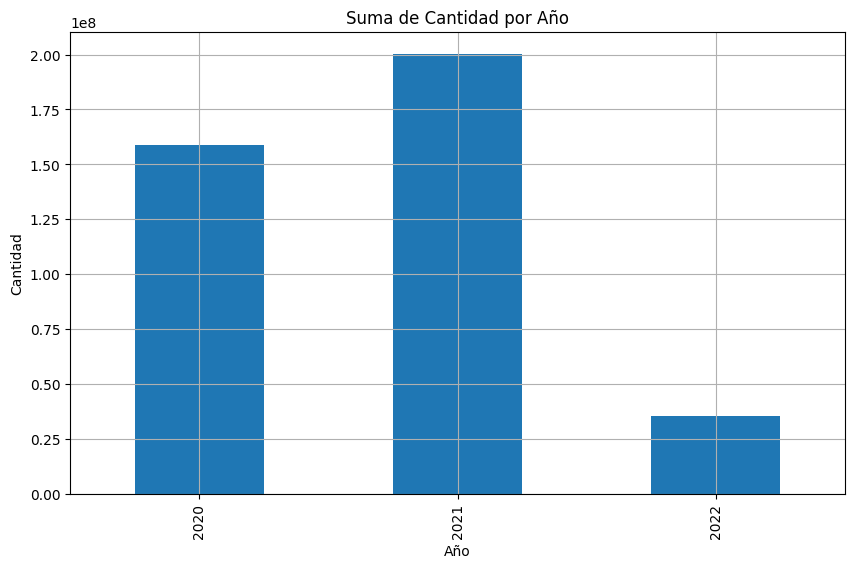

In [317]:
# Agrupar por AÑO y sumar las cantidades
cantidad_por_ano = dataflujo.groupby('AÑO')['CANTIDAD'].sum()

# Crear la gráfica
plt.figure(figsize=(10, 6))
cantidad_por_ano.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Suma de Cantidad por Año')
plt.grid(True)
plt.show()

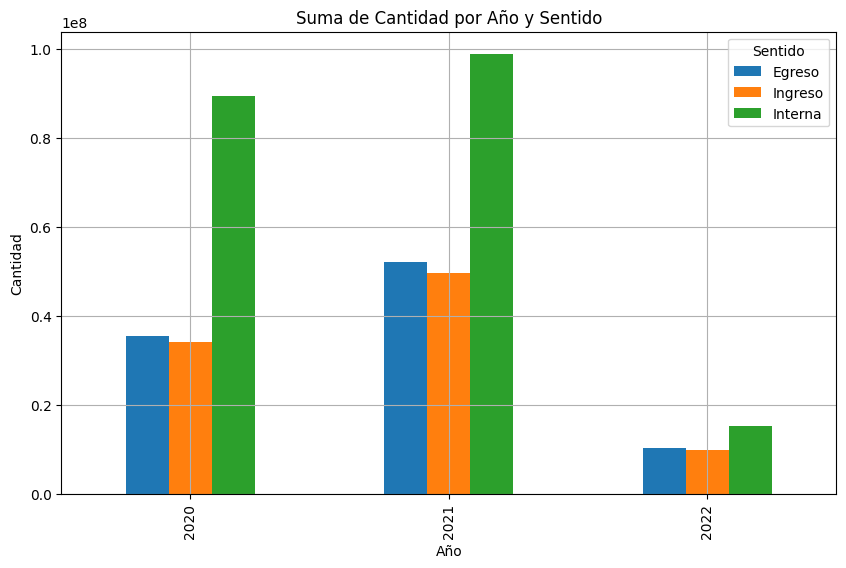

In [318]:
# Agrupar por AÑO y SENTIDO, y sumar las cantidades
cantidad_por_ano_sentido = dataflujo.groupby(['AÑO', 'SENTIDO'])['CANTIDAD'].sum().unstack()

# Crear la gráfica
cantidad_por_ano_sentido.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Suma de Cantidad por Año y Sentido')
plt.grid(True)
plt.legend(title='Sentido')
plt.show()

## Se puede visualizar que hay mas flujos de carros internamente

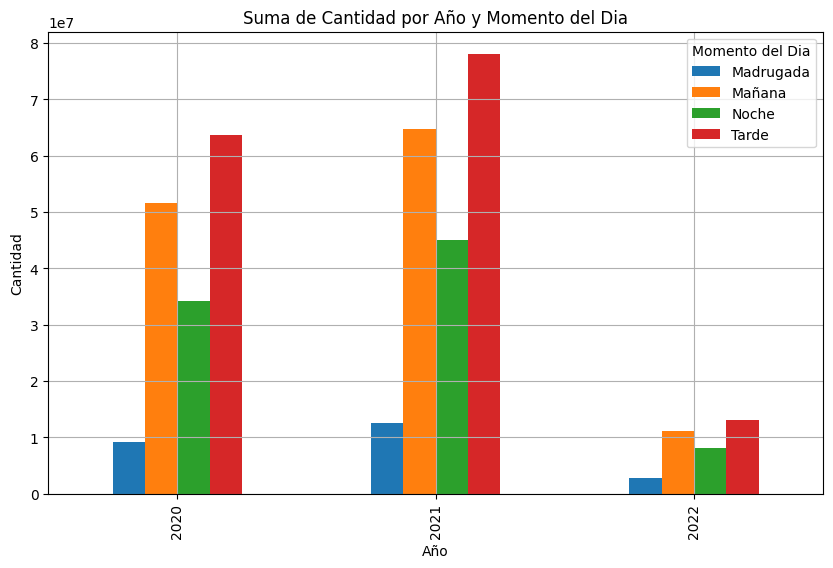

In [206]:
# Agrupar por AÑO y Momento del dia, y sumar las cantidades
cantidad_por_ano_momento = dataflujo.groupby(['AÑO', 'Momento del dia'])['CANTIDAD'].sum().unstack()

# Crear la gráfica
cantidad_por_ano_momento.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Suma de Cantidad por Año y Momento del Dia')
plt.grid(True)
plt.legend(title='Momento del Dia')
plt.show()


## Se puede visualizar que hay mas flujos de carros en la tarde

In [320]:
# Guardar el DataFrame modificado en un nuevo archivo CSV
output_file_path4 = 'data/Flujo_vehicular_modificado.csv'
dataflujo.to_csv(output_file_path4, index=False)

output_file_path4




'data/Flujo_vehicular_modificado.csv'

# Unir los dos archivos .csv de homicidios para hacer un mejor analisis y luego subir solo un archivo .csv. 


In [321]:
# Ahora realizar el merge/join de los dos dataframes por la columna 'ID'
homicidios_combinados = pd.merge(datahechos2, datavictimas, on='ID', how='inner')

# Eliminar las columnas repetidas o innecesarias
columns_to_remove = ['FECHA_y', 'AAAA_y', 'MM_y', 'DD_y', 'ROL', 'VICTIMA_y']
homicidios_combinados_cleaned = homicidios_combinados.drop(columns=columns_to_remove)


# Mostrar las primeras filas del dataframe combinado y las columnas para verificación
homicidios_combinados.head(), homicidios_combinados.columns
# quirae las columnas repetidas. 



(          ID  N_VICTIMAS     FECHA_x  AAAA_x  MM_x  DD_x      HORA HH  \
 0  2016-0001           1  01/01/2016    2016     1     1  04:00:00  4   
 1  2016-0002           1  01/02/2016    2016     1     2  01:15:00  1   
 2  2016-0003           1  01/03/2016    2016     1     3  07:00:00  7   
 3  2016-0004           1  01/10/2016    2016     1    10  00:00:00  0   
 4  2016-0005           1   1/21/2016    2016     1    21  05:20:00  5   
 
                              LUGAR_DEL_HECHO TIPO_DE_CALLE  ... MM_y DD_y  \
 0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  ...    1    1   
 1          AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ  ...    1    2   
 2                         AV ENTRE RIOS 2034       AVENIDA  ...    1    3   
 3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       AVENIDA  ...    1   10   
 4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        AVENIDA  ...    1   21   
 
          ROL  VICTIMA_y       SEXO EDAD FECHA_FALLECIMIENTO Age_Group  \
 0  CONDUC

In [322]:
# Ahora realizar el merge/join de los dos dataframes por la columna 'ID'
homicidios_combinados = pd.merge(datahechos2, datavictimas, on='ID', how='inner')

# Eliminar las columnas repetidas o innecesarias
columns_to_remove = ['FECHA_y', 'AAAA_y', 'MM_y', 'DD_y', 'ROL', 'VICTIMA_y']
homicidios_combinados_cleaned = homicidios_combinados.drop(columns=columns_to_remove)

# Mostrar las primeras filas del dataframe combinado y las columnas para verificación **del dataframe limpio**
homicidios_combinados_cleaned.head(), homicidios_combinados_cleaned.columns


(          ID  N_VICTIMAS     FECHA_x  AAAA_x  MM_x  DD_x      HORA HH  \
 0  2016-0001           1  01/01/2016    2016     1     1  04:00:00  4   
 1  2016-0002           1  01/02/2016    2016     1     2  01:15:00  1   
 2  2016-0003           1  01/03/2016    2016     1     3  07:00:00  7   
 3  2016-0004           1  01/10/2016    2016     1    10  00:00:00  0   
 4  2016-0005           1   1/21/2016    2016     1    21  05:20:00  5   
 
                              LUGAR_DEL_HECHO TIPO_DE_CALLE  ... VICTIMA_x  \
 0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  ...      MOTO   
 1          AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ  ...      AUTO   
 2                         AV ENTRE RIOS 2034       AVENIDA  ...      MOTO   
 3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       AVENIDA  ...      MOTO   
 4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        AVENIDA  ...      MOTO   
 
      ACUSADO Momento del dia  Momento del dia Numeric       SEXO EDAD  \
 0       A

In [323]:
# Guardar el dataframe combinado en un nuevo archivo CSV
output_path2 = 'data/homicidios_combinados.csv'
homicidios_combinados.to_csv(output_path2, index=False)

In [324]:
homicidios_combinados.head(), homicidios_combinados.columns
# quirae las columnas repetidas. 

(          ID  N_VICTIMAS     FECHA_x  AAAA_x  MM_x  DD_x      HORA HH  \
 0  2016-0001           1  01/01/2016    2016     1     1  04:00:00  4   
 1  2016-0002           1  01/02/2016    2016     1     2  01:15:00  1   
 2  2016-0003           1  01/03/2016    2016     1     3  07:00:00  7   
 3  2016-0004           1  01/10/2016    2016     1    10  00:00:00  0   
 4  2016-0005           1   1/21/2016    2016     1    21  05:20:00  5   
 
                              LUGAR_DEL_HECHO TIPO_DE_CALLE  ... MM_y DD_y  \
 0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  ...    1    1   
 1          AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ  ...    1    2   
 2                         AV ENTRE RIOS 2034       AVENIDA  ...    1    3   
 3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       AVENIDA  ...    1   10   
 4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        AVENIDA  ...    1   21   
 
          ROL  VICTIMA_y       SEXO EDAD FECHA_FALLECIMIENTO Age_Group  \
 0  CONDUC

# **<center>KPI's</center>**


### 1.- Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

In [325]:
# INFORMACION DE POBLACION SACADA DEL SIGUIENTE LINK
# https://www.indec.gob.ar/ftp/cuadros/poblacion/censo2022_indicadores_demograficos.pdf
Poblacion_BuenosAires = 3121707
Poblacion_BuenosAiresHombre = 1439873
Poblacion_BuenosAiresMujeres = 1681834

In [326]:
# Asegurarse de que la columna 'FECHA_x' está en formato datetime
homicidios_combinados['FECHA_x'] = pd.to_datetime(homicidios_combinados['FECHA_x'])

# Se encuentra la última fecha en tu DataFrame
ultima_fecha = homicidios_combinados['FECHA_x'].max()

# Se calcula la fecha de inicio del semestre actual y anterior
semestre_actual_inicio = ultima_fecha - pd.DateOffset(months=6)
semestre_anterior_inicio = ultima_fecha - pd.DateOffset(months=12)

# Se filtra los datos para el semestre actual y anterior
datos_semestre_actual = homicidios_combinados[(homicidios_combinados['FECHA_x'] >= semestre_actual_inicio) & (homicidios_combinados['FECHA_x'] <= ultima_fecha)]
datos_semestre_anterior = homicidios_combinados[(homicidios_combinados['FECHA_x'] >= semestre_anterior_inicio) & (homicidios_combinados['FECHA_x'] <= semestre_actual_inicio)]

# Se calcula la tasa de homicidios para el semestre actual y anterior
tasa_homicidios_actual = (datos_semestre_actual['N_VICTIMAS'].sum() / Poblacion_BuenosAires) * 100000
tasa_homicidios_anterior = (datos_semestre_anterior['N_VICTIMAS'].sum() / Poblacion_BuenosAires) * 100000

# Se calcula el crecimiento o decrecimiento comparado con el semestre anterior
variacion_porcentual = ((tasa_homicidios_actual - tasa_homicidios_anterior ) / tasa_homicidios_anterior) * 100

if variacion_porcentual <= -10:
    condicion=(f"La variacion del primer semestre con el segundo semestre, si tuvo una reduccion mayor al 10%")
else:
    condicion=(f"La variacion del primer semestre con el segundo semestre, no tuvo una reduccion mayor al 10%")


print(f"Fecha de inicio del semestre actual: {semestre_actual_inicio}")
print(f"Fecha de inicio del semestre anterior: {semestre_anterior_inicio}")
print(f"Tasa de homicidios en siniestros viales del semestre anterior: {tasa_homicidios_anterior:.2f}")
print(f"Tasa de homicidios en siniestros viales del semestre actual: {tasa_homicidios_actual:.2f}")
print(f"Variacion porcentual: {variacion_porcentual:.2f}% por lo tanto")
print(condicion)

Fecha de inicio del semestre actual: 2021-06-30 00:00:00
Fecha de inicio del semestre anterior: 2020-12-30 00:00:00
Tasa de homicidios en siniestros viales del semestre anterior: 1.76
Tasa de homicidios en siniestros viales del semestre actual: 1.35
Variacion porcentual: -23.64% por lo tanto
La variacion del primer semestre con el segundo semestre, si tuvo una reduccion mayor al 10%


### 2.-Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

In [327]:
import pandas as pd

# Asegurarte de que la columna 'FECHA_x' está en formato datetime
homicidios_combinados['FECHA_x'] = pd.to_datetime(homicidios_combinados['FECHA_x'])

# Definir los rangos de fechas para 2020 y 2021
fecha_inicio_2020 = pd.to_datetime("2020-01-01")
fecha_fin_2020 = pd.to_datetime("2020-12-31")

fecha_inicio_2021 = pd.to_datetime("2021-01-01")
fecha_fin_2021 = pd.to_datetime("2021-12-31")

# Filtrar los datos para 2020 y 2021, solo para motociclistas
datos_2020_moto = homicidios_combinados[
    (homicidios_combinados['FECHA_x'] >= fecha_inicio_2020) &
    (homicidios_combinados['FECHA_x'] <= fecha_fin_2020) &
    (homicidios_combinados['VICTIMA_x'] == 'MOTO')
]

datos_2021_moto = homicidios_combinados[
    (homicidios_combinados['FECHA_x'] >= fecha_inicio_2021) &
    (homicidios_combinados['FECHA_x'] <= fecha_fin_2021) &
    (homicidios_combinados['VICTIMA_x'] == 'MOTO')
]

# Calcular el número total de accidentes mortales para cada año
accidentes_2020 = datos_2020_moto['N_VICTIMAS'].sum()
accidentes_2021 = datos_2021_moto['N_VICTIMAS'].sum()

# Calcular el cambio porcentual en el número de accidentes mortales
cambio_porcentual_accidentes_moto = ((accidentes_2021 - accidentes_2020) / accidentes_2020) * 100 if accidentes_2020 != 0 else float('inf')

if cambio_porcentual_accidentes_moto <= -7:
    condicion2=(f"La variacion del año 2021 respecto al 2020, si tuvo una reduccion mayor al 7%")
else:
    condicion2=(f"La variacion del año 2021 respecto al 2020, no tuvo una reduccion mayor al 7%")

print(f"Accidentes mortales de motociclistas en 2020: {accidentes_2020}")
print(f"Accidentes mortales de motociclistas en 2021: {accidentes_2021}")
print(f"Cambio porcentual en accidentes mortales de motociclistas de 2020 a 2021: {cambio_porcentual_accidentes_moto:.2f}%")
print(condicion2)


Accidentes mortales de motociclistas en 2020: 30
Accidentes mortales de motociclistas en 2021: 46
Cambio porcentual en accidentes mortales de motociclistas de 2020 a 2021: 53.33%
La variacion del año 2021 respecto al 2020, no tuvo una reduccion mayor al 7%


### 3.- Reducir en un 25% la tasa de homicidios en siniestros viales de Hombres de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

In [328]:

# Se encuentra la última fecha en tu DataFrame
ultima_fecha = homicidios_combinados['FECHA_x'].max()

# Se calcula la fecha de inicio del semestre actual y anterior
semestre_actual_inicio = ultima_fecha - pd.DateOffset(months=6)
semestre_anterior_inicio = ultima_fecha - pd.DateOffset(months=12)

# Se filtra los datos para el semestre actual y anterior
datos_semestre_actual_hombre = homicidios_combinados[
    (homicidios_combinados['FECHA_x'] >= semestre_actual_inicio) &
    (homicidios_combinados['FECHA_x'] <= ultima_fecha) &
    (homicidios_combinados['SEXO'] == 'MASCULINO')
]

datos_semestre_anterior_hombre = homicidios_combinados[
    (homicidios_combinados['FECHA_x'] >= semestre_anterior_inicio) &
    (homicidios_combinados['FECHA_x'] <= semestre_actual_inicio) &
    (homicidios_combinados['SEXO'] == 'MASCULINO')
]

# Calcular el número total de víctimas para cada año, considerando solo hombres
tasaactual_2021_hombres = (datos_semestre_actual_hombre['N_VICTIMAS'].sum() / Poblacion_BuenosAiresHombre) * 100000
tasaanterior_2021_hombres = (datos_semestre_anterior_hombre['N_VICTIMAS'].sum() / Poblacion_BuenosAiresHombre) * 100000

# Calcular el cambio porcentual en el número de víctimas
cambio_porcentual_victimas_hombres = ((tasaactual_2021_hombres - tasaanterior_2021_hombres ) / tasaanterior_2021_hombres) * 100 if tasaanterior_2021_hombres != 0 else float('inf')

print(f"Tasa de homicidios en siniestros viales del semestre anterior Hombres {tasaanterior_2021_hombres}")
print(f"Tasa de homicidios en siniestros viales del semestre actual Hombres: {tasaactual_2021_hombres}")
print(f"Cambio porcentual 2021 Hombres respecto al semestre pasado: {cambio_porcentual_victimas_hombres:.2f}%")


Tasa de homicidios en siniestros viales del semestre anterior Hombres 3.1252756319480954
Tasa de homicidios en siniestros viales del semestre actual Hombres: 2.083517087965397
Cambio porcentual 2021 Hombres respecto al semestre pasado: -33.33%


### 4.- Reducir en un 25% la tasa de homicidios en siniestros viales de Mujeres de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

In [329]:
#mujeres
# Se encuentra la última fecha en tu DataFrame
ultima_fecha = homicidios_combinados['FECHA_x'].max()

# Se calcula la fecha de inicio del semestre actual y anterior
semestre_actual_inicio = ultima_fecha - pd.DateOffset(months=6)
semestre_anterior_inicio = ultima_fecha - pd.DateOffset(months=12)

# Se filtra los datos para el semestre actual y anterior
datos_semestre_actual_mujer = homicidios_combinados[
    (homicidios_combinados['FECHA_x'] >= semestre_actual_inicio) &
    (homicidios_combinados['FECHA_x'] <= ultima_fecha) &
    (homicidios_combinados['SEXO'] == 'FEMENINO')
]

datos_semestre_anterior_mujer = homicidios_combinados[
    (homicidios_combinados['FECHA_x'] >= semestre_anterior_inicio) &
    (homicidios_combinados['FECHA_x'] <= semestre_actual_inicio) &
    (homicidios_combinados['SEXO'] == 'FEMENINO')
]

# Calcular el número total de víctimas para cada año, considerando solo hombres
tasaactual_2021_mujer = (datos_semestre_actual_mujer['N_VICTIMAS'].sum() / Poblacion_BuenosAiresMujeres) * 100000
tasaanterior_2021_mujer = (datos_semestre_anterior_mujer['N_VICTIMAS'].sum() / Poblacion_BuenosAiresMujeres) * 100000

# Calcular el cambio porcentual en el número de víctimas
cambio_porcentual_victimas_hombres = ((tasaactual_2021_mujer - tasaanterior_2021_mujer ) / tasaanterior_2021_mujer) * 100 if tasaanterior_2021_hombres != 0 else float('inf')

print(f"Tasa de homicidios en siniestros viales del semestre anterior Mujeres: {tasaanterior_2021_mujer}")
print(f"Tasa de homicidios en siniestros viales del semestre actual Mujeres: {tasaactual_2021_mujer}")
print(f"Cambio porcentual 2021 Mujeres respecto al semestre pasado: {cambio_porcentual_victimas_hombres:.2f}%")
print(f'En el caso de mujeres si hubo un crecimiento del 20%')


Tasa de homicidios en siniestros viales del semestre anterior Mujeres: 0.5945890022439788
Tasa de homicidios en siniestros viales del semestre actual Mujeres: 0.7135068026927747
Cambio porcentual 2021 Mujeres respecto al semestre pasado: 20.00%
En el caso de mujeres si hubo un crecimiento del 20%


# Creacion de data frame y archivo csv de todos los KPI's

In [330]:
#THSV=Tasa de homicidios en siniestros viales del
#KPI1
THSV_semestre_anterior= 1.76 # por 100,000 habitantes
THSV_semestre_actual= 1.35
variacion_porcentual= -.2364

#KPI2
Accidentes_mortales_motociclistas2020 = 30
Accidentes_mortales_motociclistas2021 = 46
Cambio_porcentual_accidentes_moto2020_2021 = .5333

#KPI3
THSV_semestre_anterior_hombre= 3.1252756319480954 # por 100,000 habitantes
THSV_semestre_actual_hombre= 2.083517087965397
variacion_porcentual_hombre =  -.3333

#KPI4
THSV_semestre_anterior_mujer= 0.5945890022439788 # por 100,000 habitantes
THSV_semestre_actual_mujer= 0.7135068026927747
variacion_porcentual_mujer =  .20

# Crear un DataFrame de KPIS
dataKPIS = {
    'KPIs': ['THSV_semestre_anterior', 'THSV_semestre_actual', 'variacion_porcentual', 'Accidentes_mortales_motociclistas2020',
             'Accidentes_mortales_motociclistas2021', 'Cambio_porcentual_accidentes_moto2020_2021', 
             'THSV_semestre_anterior_hombre', 'HSV_semestre_actual_hombre',
             'variacion_porcentual_hombre', 'THSV_semestre_anterior_mujer', 
             'THSV_semestre_actual_mujer','variacion_porcentual_mujer'],

    'Valor': [THSV_semestre_anterior, THSV_semestre_actual, variacion_porcentual, Accidentes_mortales_motociclistas2020,
             Accidentes_mortales_motociclistas2021,Cambio_porcentual_accidentes_moto2020_2021, 
             THSV_semestre_anterior_hombre, THSV_semestre_actual_hombre,
             variacion_porcentual_hombre, THSV_semestre_anterior_mujer, 
             THSV_semestre_actual_mujer,variacion_porcentual_mujer]
}


dfKPI = pd.DataFrame(dataKPIS)

dfKPI

# Guardar el DataFrame en un archivo CSV
dfKPI.to_csv('data/KPIs.csv', index=False)


## Resumen del EDA


Hubo una baja grande de siniestros letales y de lesiones en el año 2020 debido a la pandemia. 

Hay un ligero aumento de Siniestos los dias lunes, aunque casi todos los dias se tiene la misma cantidad. 

La mayoría de las víctimas de incidentes viales se concentran en el rango de edad de 20 a 40 años.

Los incidentes con un número reducido de víctimas o con solo 1 victima son mucho más comunes que aquellos con un elevado número de víctimas.

Se registran mayores incidentes en Diciembre y disminución en Abril.

Las avenidas, con mayor tráfico y velocidad, presentan una mayor incidencia de siniestros que las calles y autopistas.

Los incidentes involucrando peatones y pasajeros son frecuentes, destacando la vulnerabilidad de estos grupos.

Los automóviles, especialmente aquellos que transportan pasajeros, son los más comúnmente acusados en incidentes viales.

Los incidentes son más frecuentes durante las horas pico del tráfico. Que son en la mañana, cuando entran a trabajar. 

Los hombres son las principales víctimas de incidentes viales.

Las comunas 1, 4, 9 y 8 presentan el mayor número de víctimas, sugiriendo que estas áreas tienen un mayor riesgo de accidentes de tránsito.



## Conclusiones

Este proyecto ha proporcionado una perspectiva esclarecedora sobre los siniestros y accidentes viales en Buenos Aires, revelando patrones críticos y factores de riesgo que inciden notablemente en la seguridad vial. Los resultados de nuestro análisis subrayan la relevancia de factores como la edad, la densidad del tráfico, y particularidades temporales en la incidencia de los siniestros. Específicamente, hemos identificado que los individuos entre 20 y 40 años representan la mayoría de las víctimas, lo que señala una urgente necesidad de enfocar las medidas preventivas hacia este grupo demográfico. Además, la disminución de accidentes durante la pandemia de 2020 sugiere que la reducción del tráfico puede tener un impacto directo en la frecuencia de los incidentes.

La distribución temporal y geográfica de los accidentes, con picos durante las horas de ingreso laboral y una mayor concentración en ciertas comunas, proporciona un marco para la implementación de estrategias de prevención y mejora de la infraestructura vial en las zonas más afectadas. La prevalencia de siniestros en avenidas y durante días laborales iniciales, como los lunes, plantea la necesidad de revisar la gestión del tráfico y la señalización en estos puntos críticos.

Frente a estos hallazgos, recomendamos la adopción de políticas públicas enfocadas en la educación vial, la mejora de la infraestructura en puntos clave, y la implementación de tecnologías de tráfico inteligente que permitan una mejor regulación del flujo vehicular. Además, consideramos crucial la integración de campañas de concientización dirigidas específicamente a los hombres y a los jóvenes adultos, así como el fortalecimiento de las regulaciones sobre los vehículos que transportan pasajeros, quienes frecuentemente están involucrados en estos incidentes.

Al actuar sobre estos factores de riesgo identificados, Buenos Aires puede aspirar a una notable reducción en la frecuencia y severidad de los accidentes viales, mejorando así la seguridad y la calidad de vida de todos sus habitantes.